In [1]:
# Analyse trees from ts

In [46]:
library(tidyverse)
library(ape)
library(data.table)
library(tictoc)


Attaching package: ‘tictoc’


The following object is masked from ‘package:data.table’:

    shift




In [7]:
## Function ----
get_tmrcas <- function(treeList, inds1, inds2){
  tmp_treeList = treeList
  tmrca_total = c()
  tmrca_YF3 = c()
  tmrca_MF3 = c()
  
  for(treeID in 1:nrow(treeList)){
    tmp_tr = read.tree(text = treeList$tree[treeID])
    tmp_tmrcaTotal = max(node.depth.edgelength(tmp_tr))
    tmp_tmrcaYF3 = max(node.depth.edgelength(keep.tip(tmp_tr, inds1)))
    tmp_tmrcaMF3 = max(node.depth.edgelength(keep.tip(tmp_tr, inds2)))
    
    tmrca_total = c(tmrca_total, tmp_tmrcaTotal)
    tmrca_YF3 = c(tmrca_YF3, tmp_tmrcaYF3)
    tmrca_MF3 = c(tmrca_MF3, tmp_tmrcaMF3)
  }
  
  tmp_treeList$tmrcaTotal = tmrca_total
  tmp_treeList$tmrcaYF3 = tmrca_YF3
  tmp_treeList$tmrcaMF3 = tmrca_MF3
  
  return(tmp_treeList)
}
get_windowed_tmrcas <- function(treeList, start, end, windowSize, stepSize){
  # start = 52800000
  # end = 53200000
  # windowSize = 10000
  # stepSize = 1000
  
  windowStarts = seq(start, end-stepSize, stepSize)
  windowEnds = seq((start+stepSize), end, stepSize)
  
  tmpWinTrees = data.table()
  # (winStart, winEnd, winTMRCA, winTMRCA_wYF, winTMRCA_wMF)
  for(winID in 1:length(windowStarts)){
    # winID=1
    winStart = windowStarts[winID]
    winEnd = windowEnds[winID]
    winTrees = treeList[treeEnd>=winStart & treeStart<=winEnd]
    winTMRCA = median(winTrees$tmrcaTotal)
    winTMRCA_wYF = median(winTrees$tmrcaYF3)
    winTMRCA_wMF = median(winTrees$tmrcaMF3)
    
    winPairTMRCA_wYF_mean = median(winTrees$mean_pairTMRCA_wYF3)
    winPairTMRCA_wYF_median = median(winTrees$median_pairTMRCA_wYF3)
    winPairTMRCA_wYF_min = median(winTrees$min_pairTMRCA_wYF3)
    winPairTMRCA_wYF_max = median(winTrees$max_pairTMRCA_wYF3)

    winPairTMRCA_wMF_mean = median(winTrees$mean_pairTMRCA_wMF3)
    winPairTMRCA_wMF_median = median(winTrees$median_pairTMRCA_wMF3)
    winPairTMRCA_wMF_min = median(winTrees$min_pairTMRCA_wMF3)
    winPairTMRCA_wMF_max = median(winTrees$max_pairTMRCA_wMF3)
    
    winCrossPairTMRCA_mean = median(winTrees$mean_crosspairTMRCA)
    winCrossPairTMRCA_median = median(winTrees$mean_crosspairTMRCA)
    winCrossPairTMRCA_min = median(winTrees$min_crosspairTMRCA)
    winCrossPairTMRCA_max = median(winTrees$max_crosspairTMRCA)
    
    tmpWinTrees = rbind(tmpWinTrees,
                        data.table(winStart, winEnd, 
                                   winTMRCA, winTMRCA_wYF, winTMRCA_wMF,
                                   winPairTMRCA_wYF_mean, winPairTMRCA_wYF_median, winPairTMRCA_wYF_min, winPairTMRCA_wYF_max,
                                   winPairTMRCA_wMF_mean, winPairTMRCA_wMF_median, winPairTMRCA_wMF_min, winPairTMRCA_wMF_max,
                                   winCrossPairTMRCA_mean, winCrossPairTMRCA_median, winCrossPairTMRCA_min, winCrossPairTMRCA_max))
  }
  return(tmpWinTrees)
}
get_pairwise_tmrcas <- function(tree, inds1, inds2){
  # inds1 = inds_YF3
  # inds2 = inds_MF3
  
  ## Within inds1
  tr_inds1 = keep.tip(phy = tree, tip = inds1)
  pairTMRCAs = cophenetic.phylo(tr_inds1)/2
  mean_pairTMRCA = mean(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  median_pairTMRCA = median(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  min_pairTMRCA = min(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  max_pairTMRCA = max(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  pairTMRCAs_inds1 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  # pairTMRCA=c()  
  # inds1_pairs = combn(inds1, 2)
  # for(pairID in 1:ncol(inds1_pairs)){
  #   pair = inds1_pairs[,pairID]
  #   pairTMRCA[pairID] = cophenetic.phylo(tr)[pair[1], pair[2]]/2
  # }
  # mean_pairTMRCA = mean(pairTMRCA)
  # median_pairTMRCA = median(pairTMRCA)
  # min_pairTMRCA = min(pairTMRCA)
  # max_pairTMRCA = max(pairTMRCA)
  # pairTMRCAs_inds1 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  ## Within inds1
  tr_inds2 = keep.tip(phy = tree, tip = inds2)
  pairTMRCAs = cophenetic.phylo(tr_inds2)/2
  mean_pairTMRCA = mean(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  median_pairTMRCA = median(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  min_pairTMRCA = min(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  max_pairTMRCA = max(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  pairTMRCAs_inds2 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)

  # pairTMRCA=c()  
  # inds2_pairs = combn(inds2, 2)
  # for(pairID in 1:ncol(inds2_pairs)){
  #   pair = inds2_pairs[,pairID]
  #   pairTMRCA[pairID] = cophenetic.phylo(tr)[pair[1], pair[2]]/2
  # }
  # mean_pairTMRCA = mean(pairTMRCA)
  # median_pairTMRCA = median(pairTMRCA)
  # min_pairTMRCA = min(pairTMRCA)
  # max_pairTMRCA = max(pairTMRCA)
  # pairTMRCAs_inds2 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  pairTMRCAs=c()
  crosspairs = tidyr::expand_grid(inds1, inds2)
  for(pairID in 1:nrow(crosspairs)){
    pair = crosspairs[pairID,]
    pairTMRCAs[pairID] = cophenetic.phylo(tree)[pair[[1]], pair[[2]]]/2
  }
  mean_pairTMRCA = mean(pairTMRCAs)
  median_pairTMRCA = median(pairTMRCAs)
  min_pairTMRCA = min(pairTMRCAs)
  max_pairTMRCA = max(pairTMRCAs)
  crosspairTMRCAs =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  pairTMRCAs = cbind(pairTMRCAs_inds1, pairTMRCAs_inds2, crosspairTMRCAs)
  # colnames(pairTMRCAs) = c(mean_pairTMRCA_wYF3, median_pairTMRCA_wYF3, min_pairTMRCA_wYF3, max_pairTMRCA_wYF3,
  #                          mean_pairTMRCA_wMF3, median_pairTMRCA_wMF3, min_pairTMRCA_wMF3, max_pairTMRCA_wMF3,
  #                          mean_crosspairTMRCA, median_crosspairTMRCA, min_crosspairTMRCA, max_crosspairTMRCA)
  
  return(pairTMRCAs)
}

In [69]:
## Load samples
allSampleData = fread('/Users/apal/Phd/Projects/2021-snap_hap/sample_info/samples_Amajus_SnapHapColor_LastUpdate-2024-05.txt')
str(allSampleData)
# samples_mFRyYe = fread('/Users/apal/Phd/Projects/2021-snap_hap/ARGs/samples/samples_MF3-FR_YF3-Ye.txt')
# colnames(samples_mFRyYe) = 'PlantID_longFormat_refVersion'
gnn = fread('./gnn.txt')

Classes ‘data.table’ and 'data.frame':	1074 obs. of  23 variables:
 $ PlantID                      : chr  "pb0174" "pb0216" "pb0294" "pb0349" ...
 $ PlantID_UPPER                : chr  "PB0174" "PB0216" "PB0294" "PB0349" ...
 $ PlantID_LongFormat           : chr  "10x-1_Am_Pla_pb0174" "10x-2_Am_Pla_pb0216" "10x-3_Am_Pla_pb0294" "10x-4_Am_Pla_pb0349" ...
 $ PlantID_longFormat_refVersion: chr  "10x-1_Am_Pla_pb0174_v3.5" "10x-2_Am_Pla_pb0216_v3.5" "10x-3_Am_Pla_pb0294_v3.5" "10x-4_Am_Pla_pb0349_v3.5" ...
 $ Batch                        : chr  "10x" "10x" "10x" "10x" ...
 $ Batch_PlantID                : chr  "10x_PB0174" "10x_PB0216" "10x_PB0294" "10x_PB0349" ...
 $ PlantID_Batch                : chr  "PB0174_10x" "PB0216_10x" "PB0294_10x" "PB0349_10x" ...
 $ Species                      : chr  "Am" "Am" "Am" "Am" ...
 $ Location                     : chr  "Pla" "Pla" "Pla" "Pla" ...
 $ Coverage_mean                : num  19.86 14.2 9.78 9.39 13.49 ...
 $ Coverage_stdev               : nu

In [70]:
## Merge sample names 
gnn = merge(gnn, allSampleData, by = 'PlantID_longFormat_refVersion')
str(gnn)

Classes ‘data.table’ and 'data.frame':	84 obs. of  27 variables:
 $ PlantID_longFormat_refVersion: chr  "10x2-15_Am_Pla_pb1253_v3.5" "10x2-15_Am_Pla_pb1253_v3.5" "10x2-17_Am_Pla_pb2190_v3.5" "10x2-17_Am_Pla_pb2190_v3.5" ...
 $ Sample node                  : int  0 1 44 45 52 53 54 55 56 57 ...
 $ name                         : chr  "mFR" "mFR" "yYe" "yYe" ...
 $ mFR                          : num  0.7737 0.767 0.3321 0.1434 0.0972 ...
 $ yYe                          : num  0.226 0.233 0.668 0.857 0.903 ...
 $ PlantID                      : chr  "pb1253" "pb1253" "pb2190" "pb2190" ...
 $ PlantID_UPPER                : chr  "PB1253" "PB1253" "PB2190" "PB2190" ...
 $ PlantID_LongFormat           : chr  "10x-15_Am_Pla_pb1253" "10x-15_Am_Pla_pb1253" "10x-17_Am_Pla_pb2190" "10x-17_Am_Pla_pb2190" ...
 $ Batch                        : chr  "10x2" "10x2" "10x2" "10x2" ...
 $ Batch_PlantID                : chr  "10x2_PB1253" "10x2_PB1253" "10x2_PB2190" "10x2_PB2190" ...
 $ PlantID_Batch         

In [74]:
gnn = gnn[order(Longitude),]

In [29]:
## Load RosEl trees
ts_rosel = fread('./ts.RosEl.trList.newick.txt')
ts_rosel$treeID=1:nrow(ts_rosel)
## Load neutral trees
ts_neu = fread('./ts.neu.trList.newick.txt')
ts_neu$treeID=1:nrow(ts_neu)

In [30]:
str(ts_rosel)

Classes ‘data.table’ and 'data.frame':	10426 obs. of  5 variables:
 $ treeStart: num  52800008 52800120 52800147 52800157 52800224 ...
 $ treeEnd  : num  52800120 52800147 52800157 52800224 52800244 ...
 $ treeSpan : num  112 27 10 67 20 75 76 90 188 204 ...
 $ tree     : chr  "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n7:1410.73186430138684955,n23:1410.73186430138684"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ ...
 $ treeID   : int  1 2 3 4 5 6 7 8 9 10 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [31]:
Ros1 = c(52889323, 52889737)
Ros2 = c(52912351, 52912777)
El = c(53060761, 53062505)
offset = 52800000
Ne=354349
inds_YF3 = sapply(seq(0,43,1), function(x){paste0('n',x)})
inds_MF3 = sapply(seq(44,83,1), function(x){paste0('n',x)})
windowSize = 10000
stepSize = 1000

In [32]:
ts_rosel = get_tmrcas(ts_rosel, inds_YF3, inds_MF3)
ts_neu = get_tmrcas(ts_neu, inds_YF3, inds_MF3)

In [55]:
str(ts_rosel)

Classes ‘data.table’ and 'data.frame':	10426 obs. of  8 variables:
 $ treeStart : num  52800008 52800120 52800147 52800157 52800224 ...
 $ treeEnd   : num  52800120 52800147 52800157 52800224 52800244 ...
 $ treeSpan  : num  112 27 10 67 20 75 76 90 188 204 ...
 $ tree      : chr  "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n7:1410.73186430138684955,n23:1410.73186430138684"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ "(n18:1222683.65382736525498331,n27:1222683.65382736525498331,(n17:981.14929096407365705,n21:981.149290964073657"| __truncated__ ...
 $ treeID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tmrcaTotal: num  1222684 1222684 1222684 1222684 1222684 ...
 $ tmrcaYF3  : num  1222684 1222684 1222684 1222684 1222684 ...
 $ tmrcaMF3  : num  12226

In [56]:
str(ts_neu)

Classes ‘data.table’ and 'data.frame':	5370 obs. of  8 variables:
 $ treeStart : num  3e+07 3e+07 3e+07 3e+07 3e+07 ...
 $ treeEnd   : num  3e+07 3e+07 3e+07 3e+07 3e+07 ...
 $ treeSpan  : num  130 5095 280 273 178 ...
 $ tree      : chr  "(n7:852946.05592028726823628,n46:852946.05592028726823628,((n28:298059.14681404066504911,((n47:56604.3525866576"| __truncated__ "(n7:437310.36748853081371635,((n28:298059.14681404066504911,((n47:56604.35258665768924402,(n46:14697.4318475026"| __truncated__ "((n28:298059.14681404066504911,((n47:56604.35258665768924402,((n48:2809.91743721207512863,n60:2809.917437212075"| __truncated__ "((n7:4142.53278706101627904,n46:4142.53278706101627904):433167.83470146980835125,((n28:298059.14681404066504911"| __truncated__ ...
 $ treeID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tmrcaTotal: num  852946 437310 437310 437310 910472 ...
 $ tmrcaYF3  : num  852946 437310 437310 437310 437310 ...
 $ tmrcaMF3  : num  852946 437310 437310 437310 910472 ...
 - attr(*, ".intern

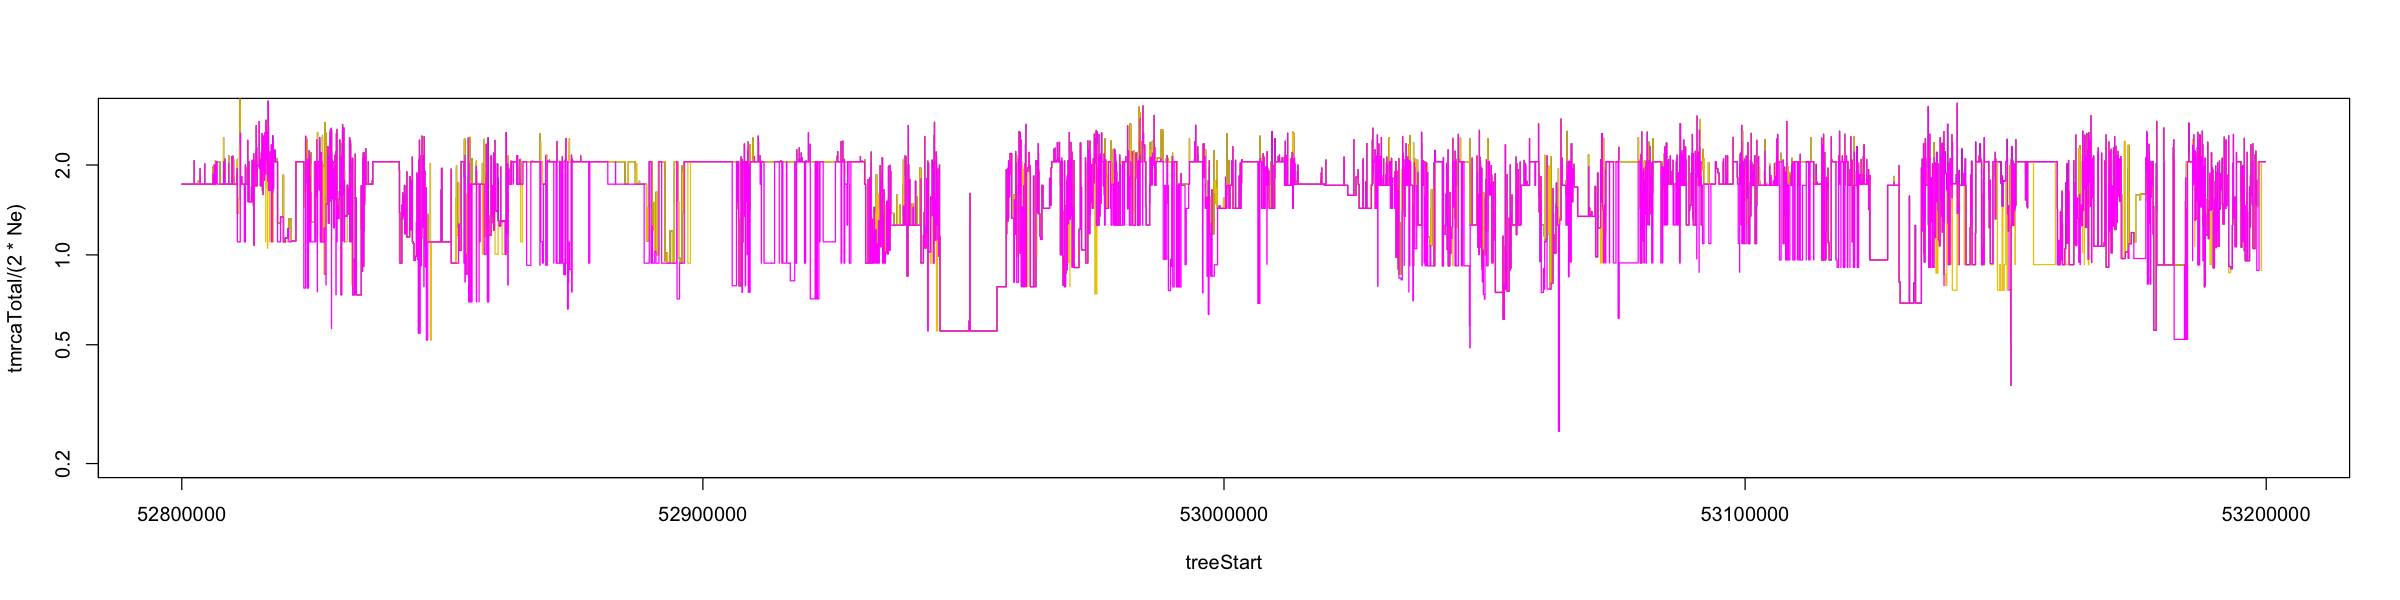

In [20]:
options(repr.plot.width=20, repr.plot.height=5)
Ros1 = c(52889323, 52889737)
Ros2 = c(52912351, 52912777)
El = c(53060761, 53062505)

xLimits = c(52800000, 53200000)
yLimits = c(0.2,3)
plot(tmrcaTotal/(2*Ne)~treeStart, ts_rosel, type='s', xlim=xLimits, ylim=yLimits, log='y')
points(tmrcaYF3/(2*Ne)~treeStart, ts_rosel, type='s', xlim=xLimits, ylim=yLimits, col='gold2')
points(tmrcaMF3/(2*Ne)~treeStart, ts_rosel, type='s', xlim=xLimits, ylim=yLimits, col='magenta')

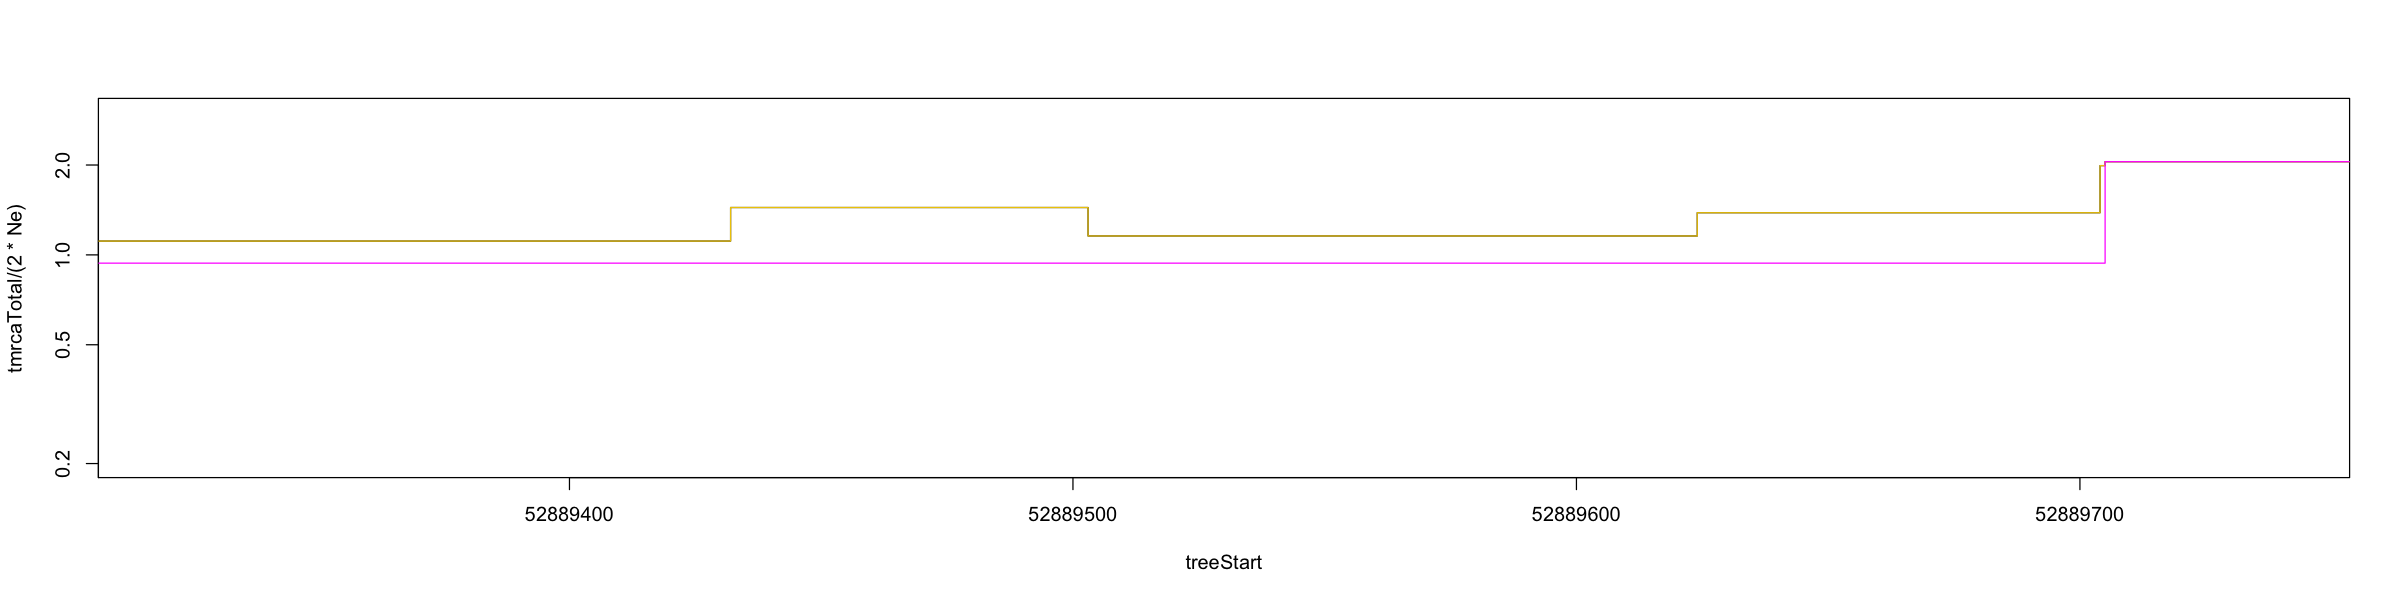

In [24]:
options(repr.plot.width=20, repr.plot.height=5)

plot(tmrcaTotal/(2*Ne)~treeStart, ts_rosel, type='s', xlim=Ros1, ylim=yLimits, log='y')
points(tmrcaYF3/(2*Ne)~treeStart, ts_rosel, type='s', xlim=Ros2, ylim=yLimits, col='gold2')
points(tmrcaMF3/(2*Ne)~treeStart, ts_rosel, type='s', xlim=El, ylim=yLimits, col='magenta')

In [57]:
nrow(ts_rosel[treeStart > Ros1[1]-1000 & treeEnd < Ros1[2]+1000])
# print(ts_rosel[treeStart > Ros1[1]-1000 & treeEnd < Ros1[2]+1000][,c(1:3,5)])

[1] 38

In [89]:
## Plotting trees
inds_col <- data.frame(inds=c(inds_MF3, inds_YF3), col=c(rep('gold2',44),rep('magenta',40)))
# inds_col

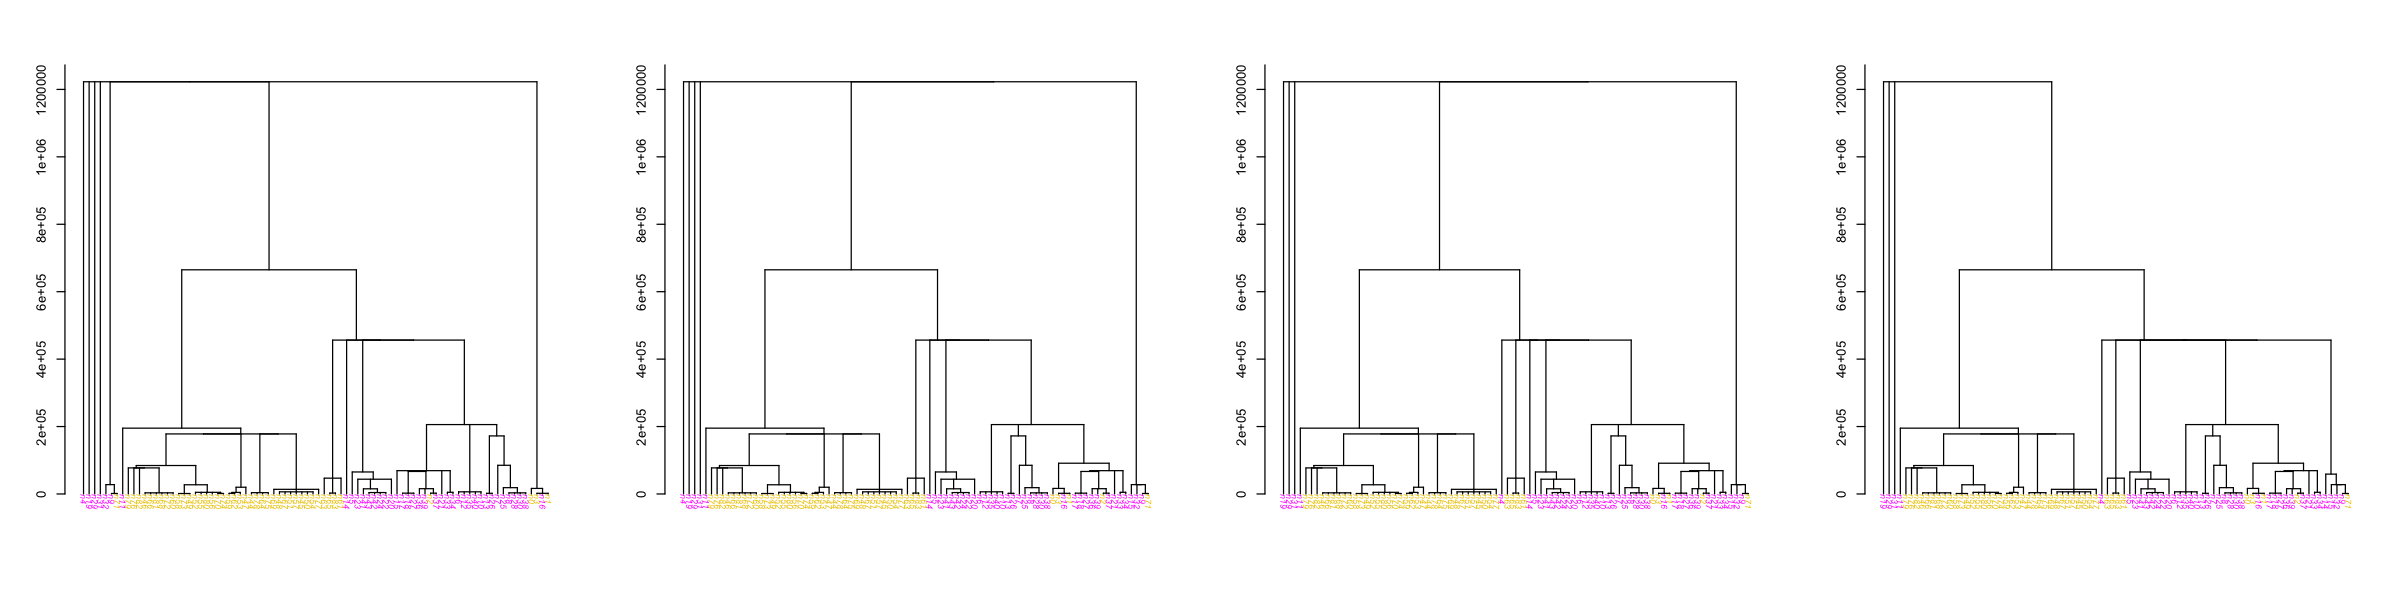

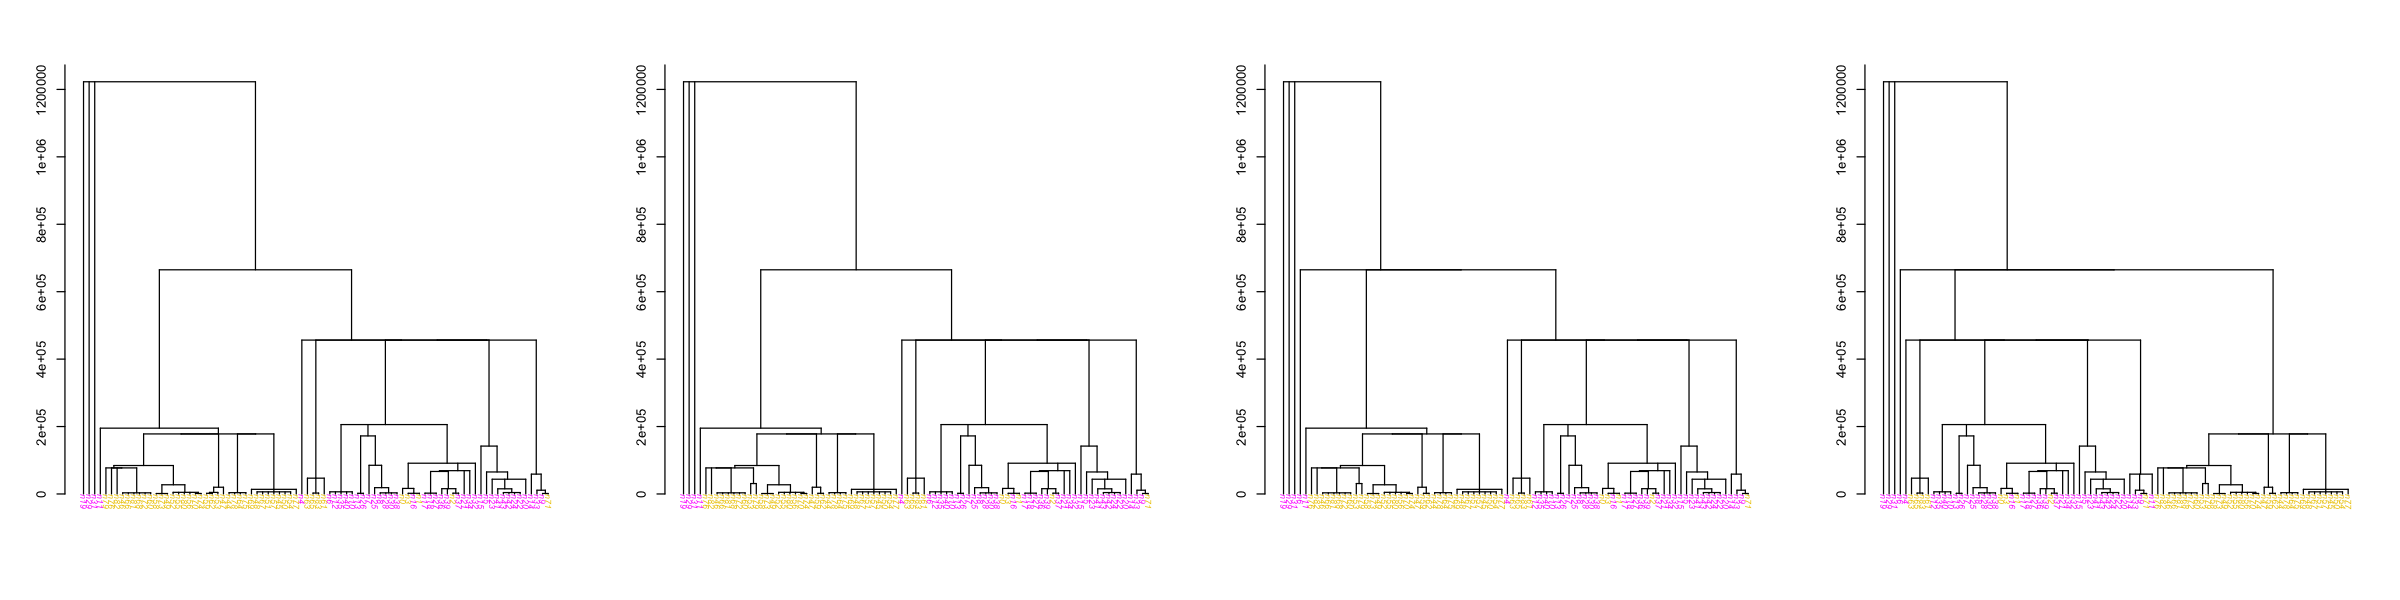

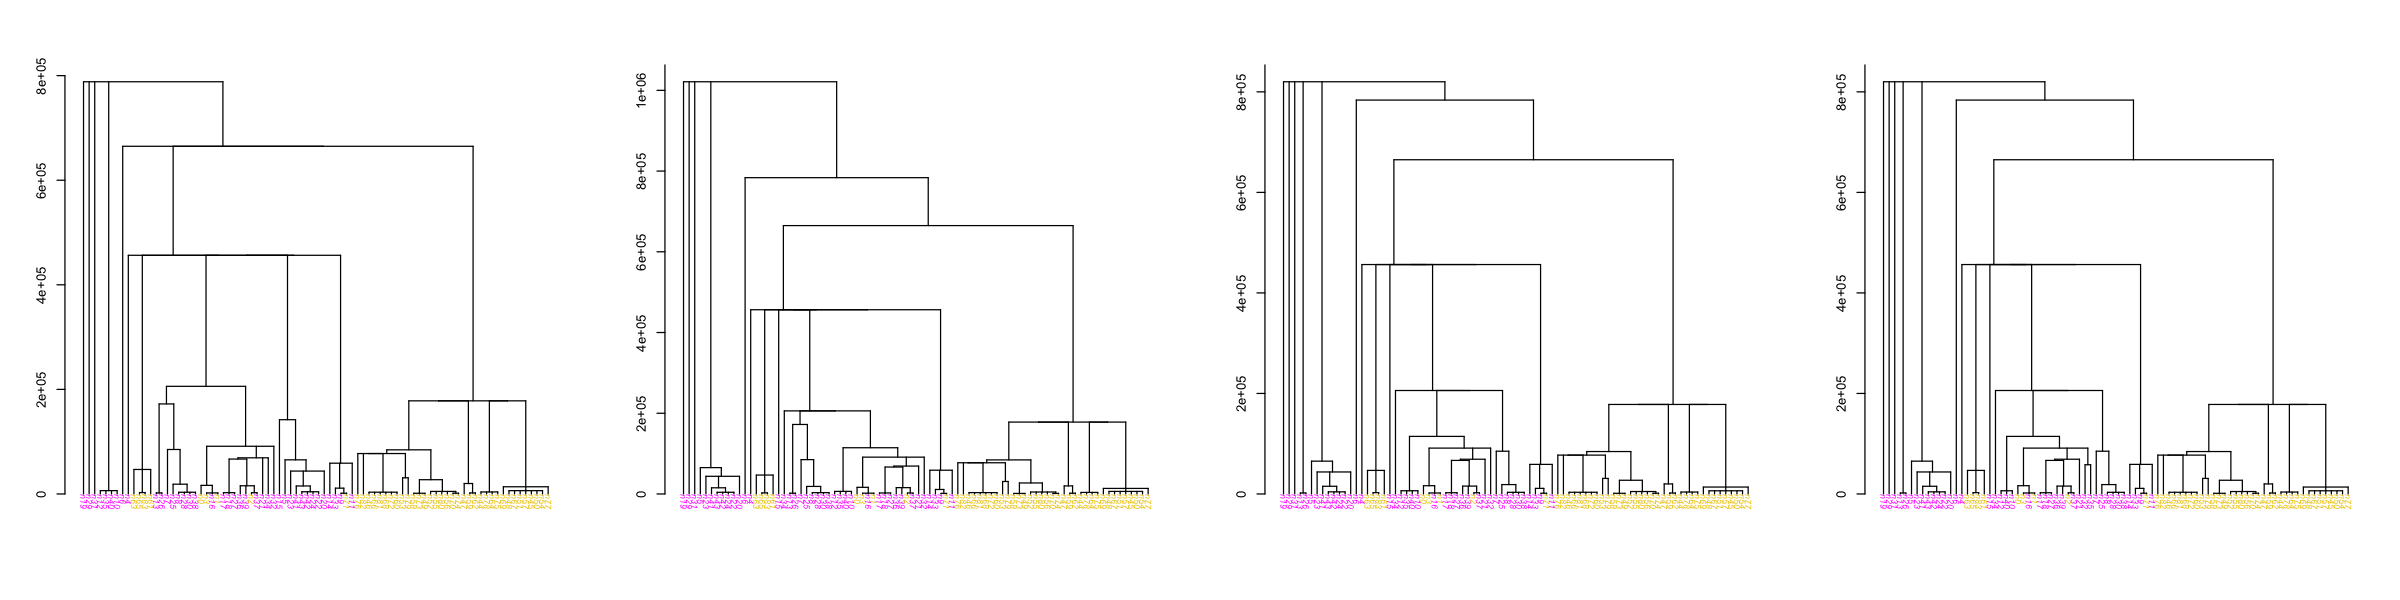

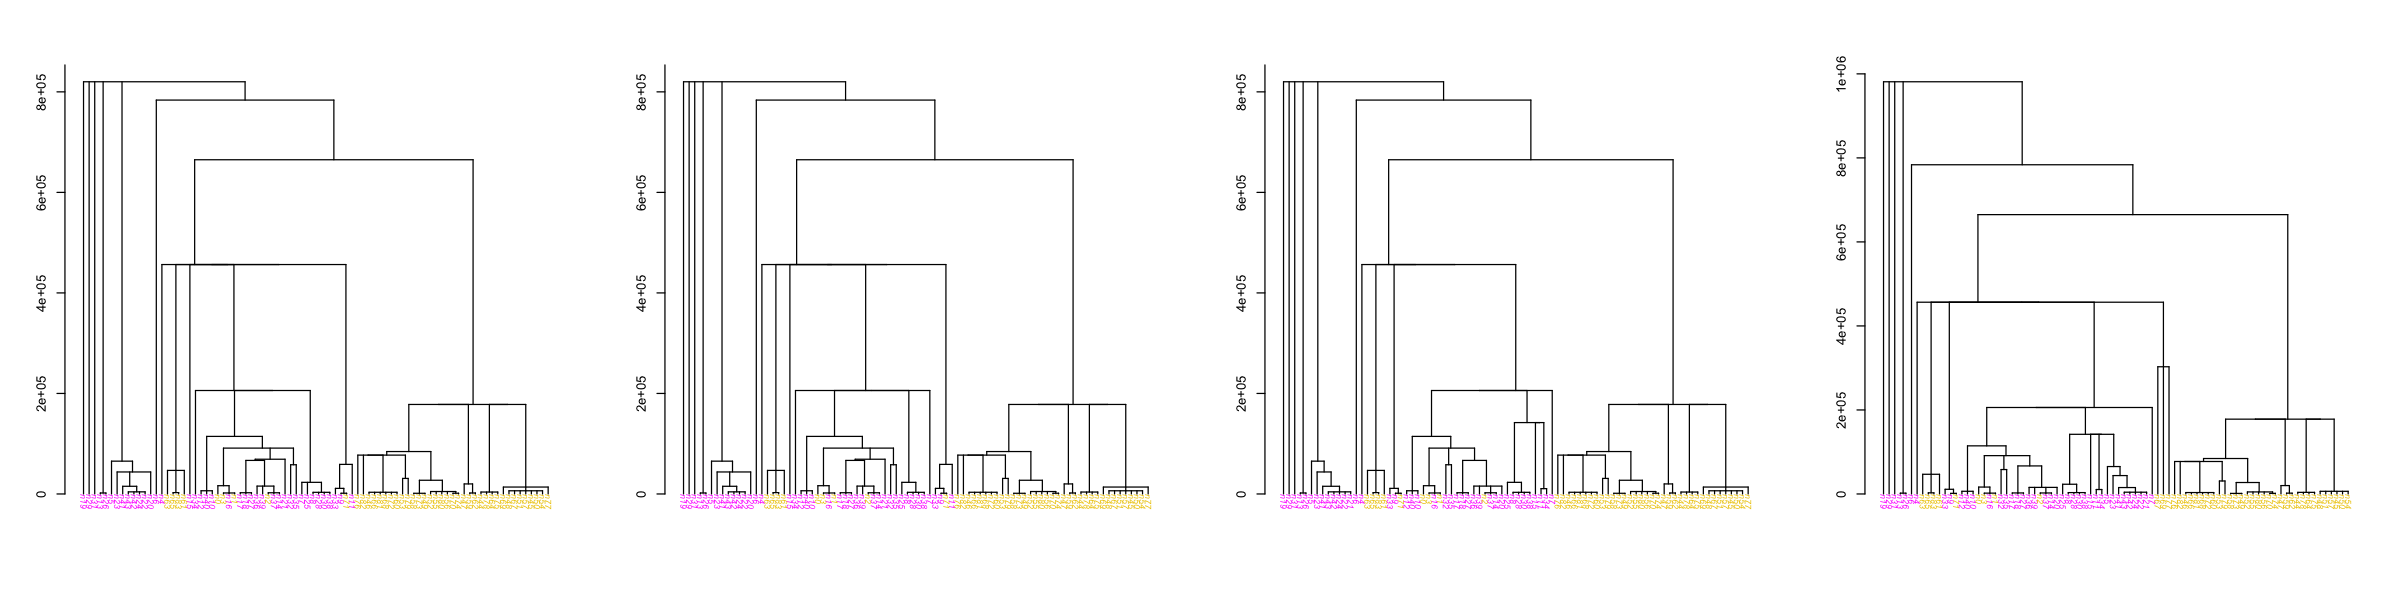

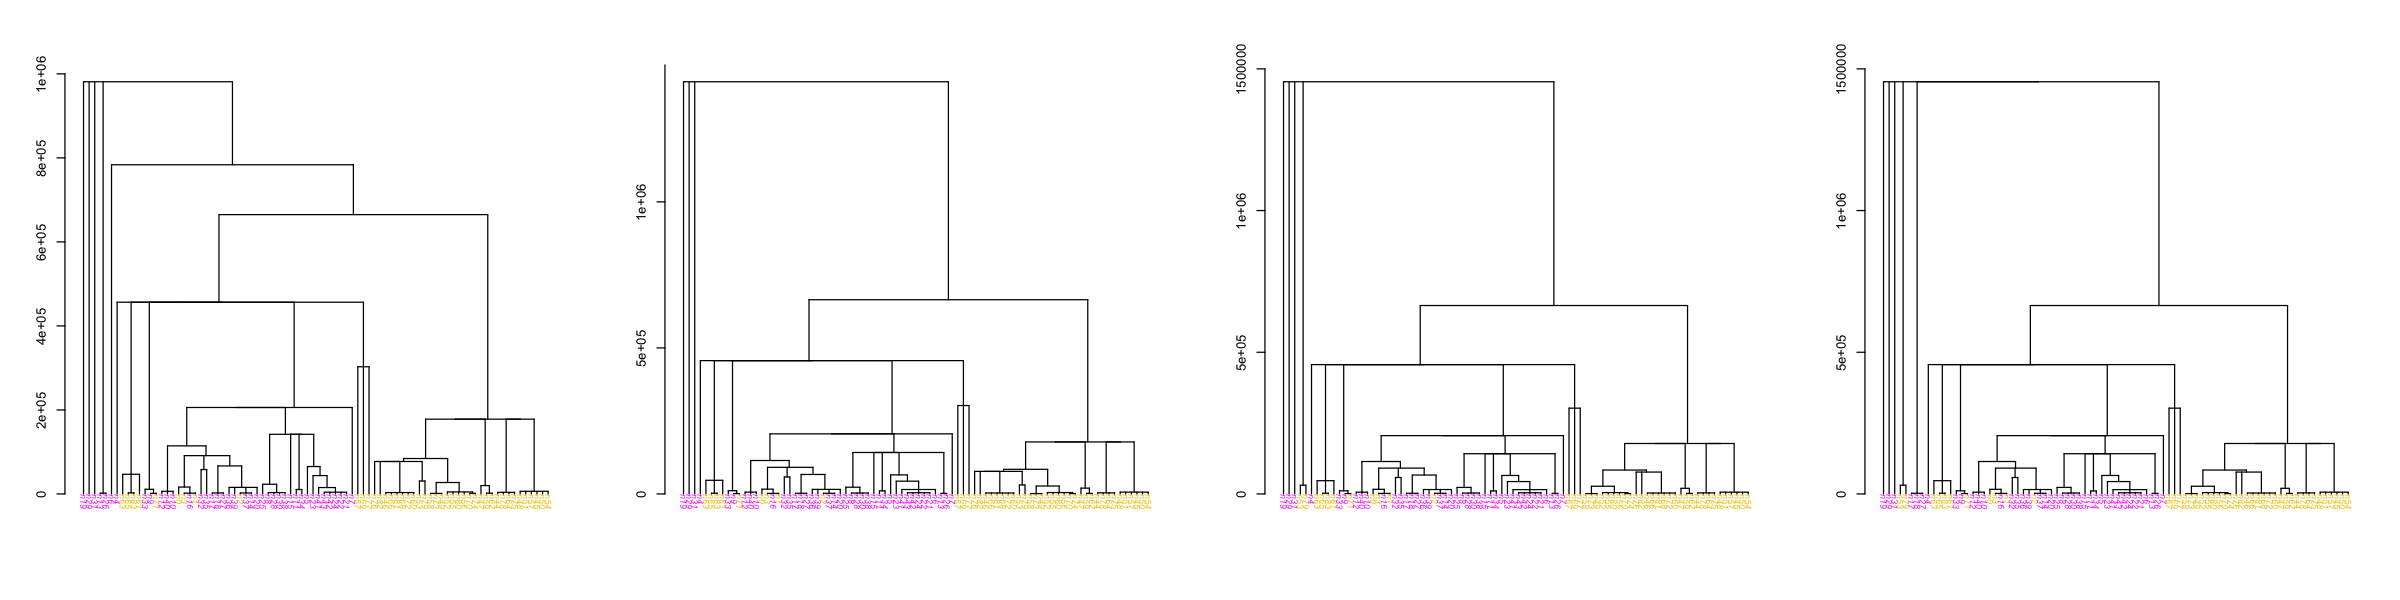

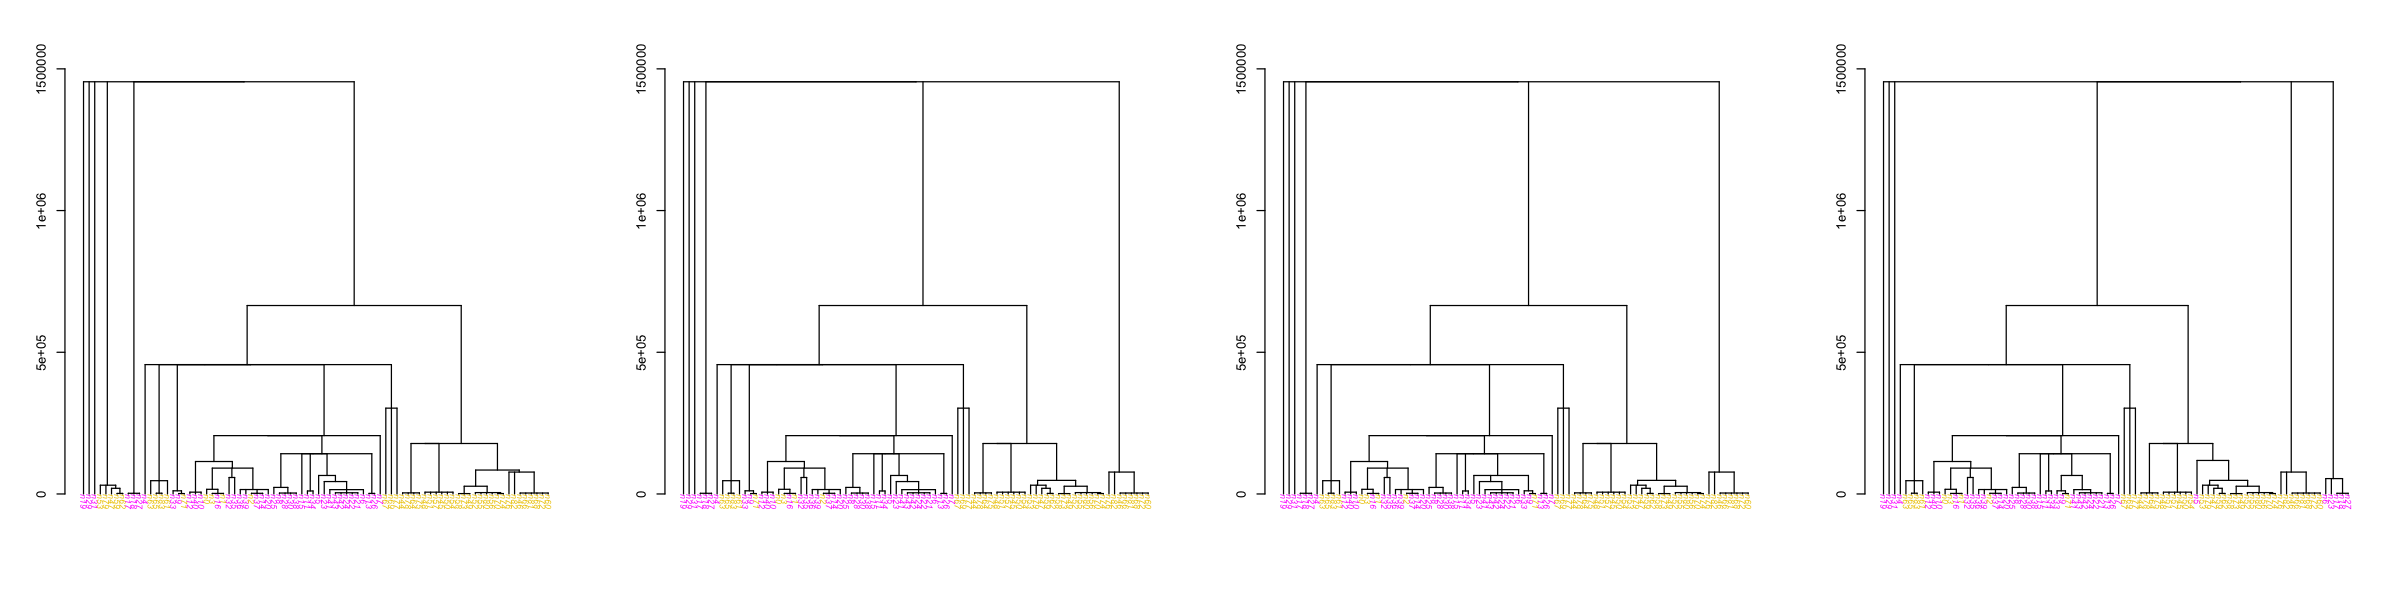

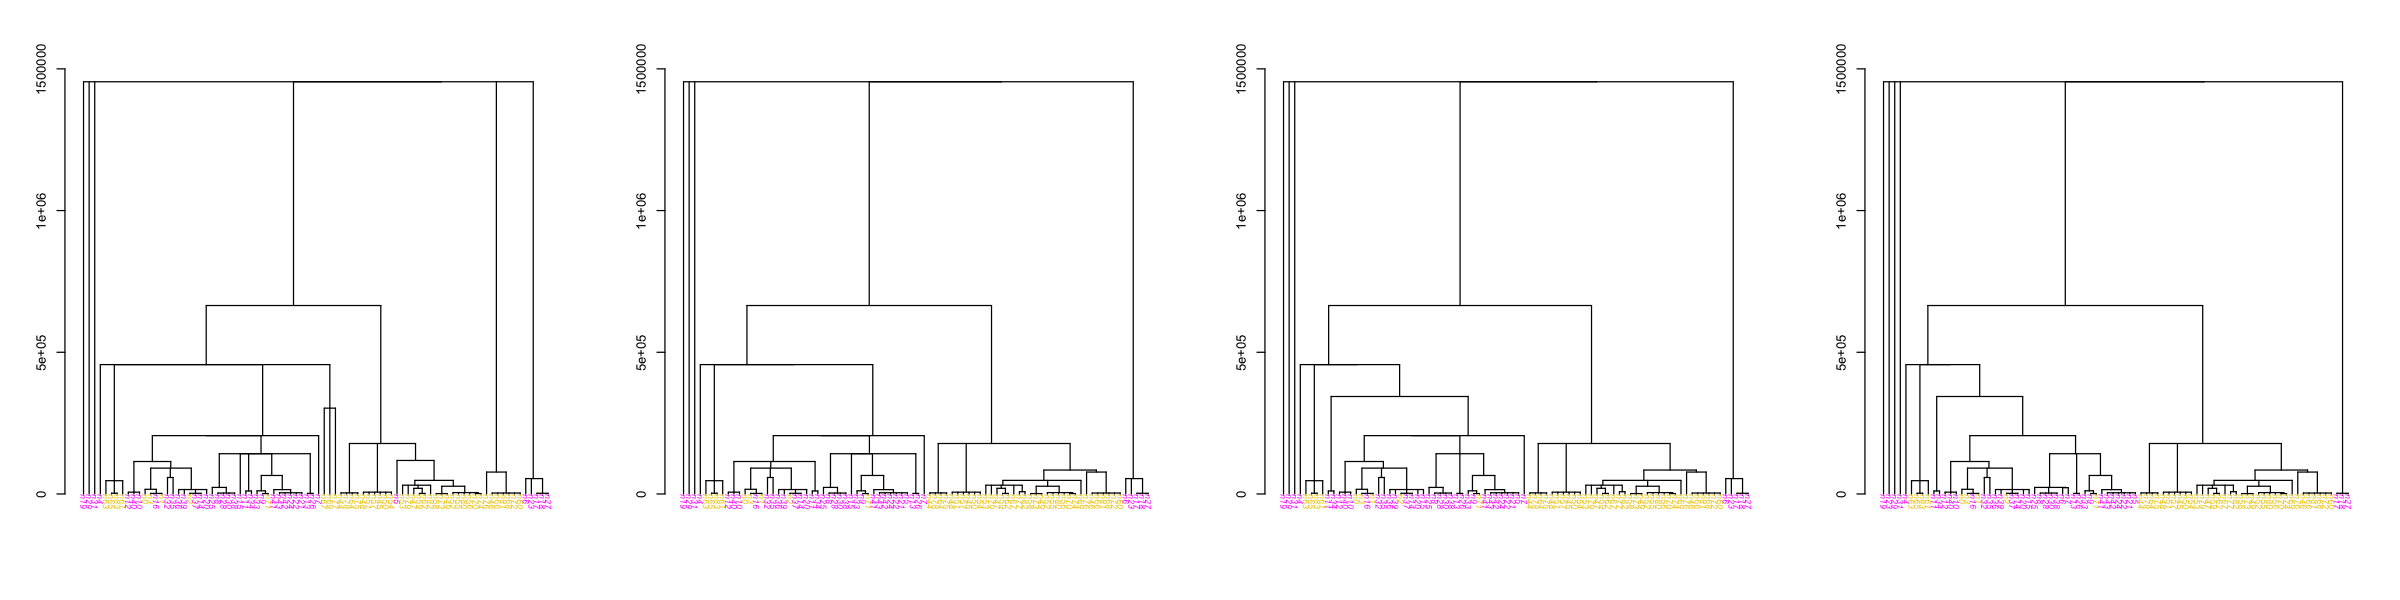

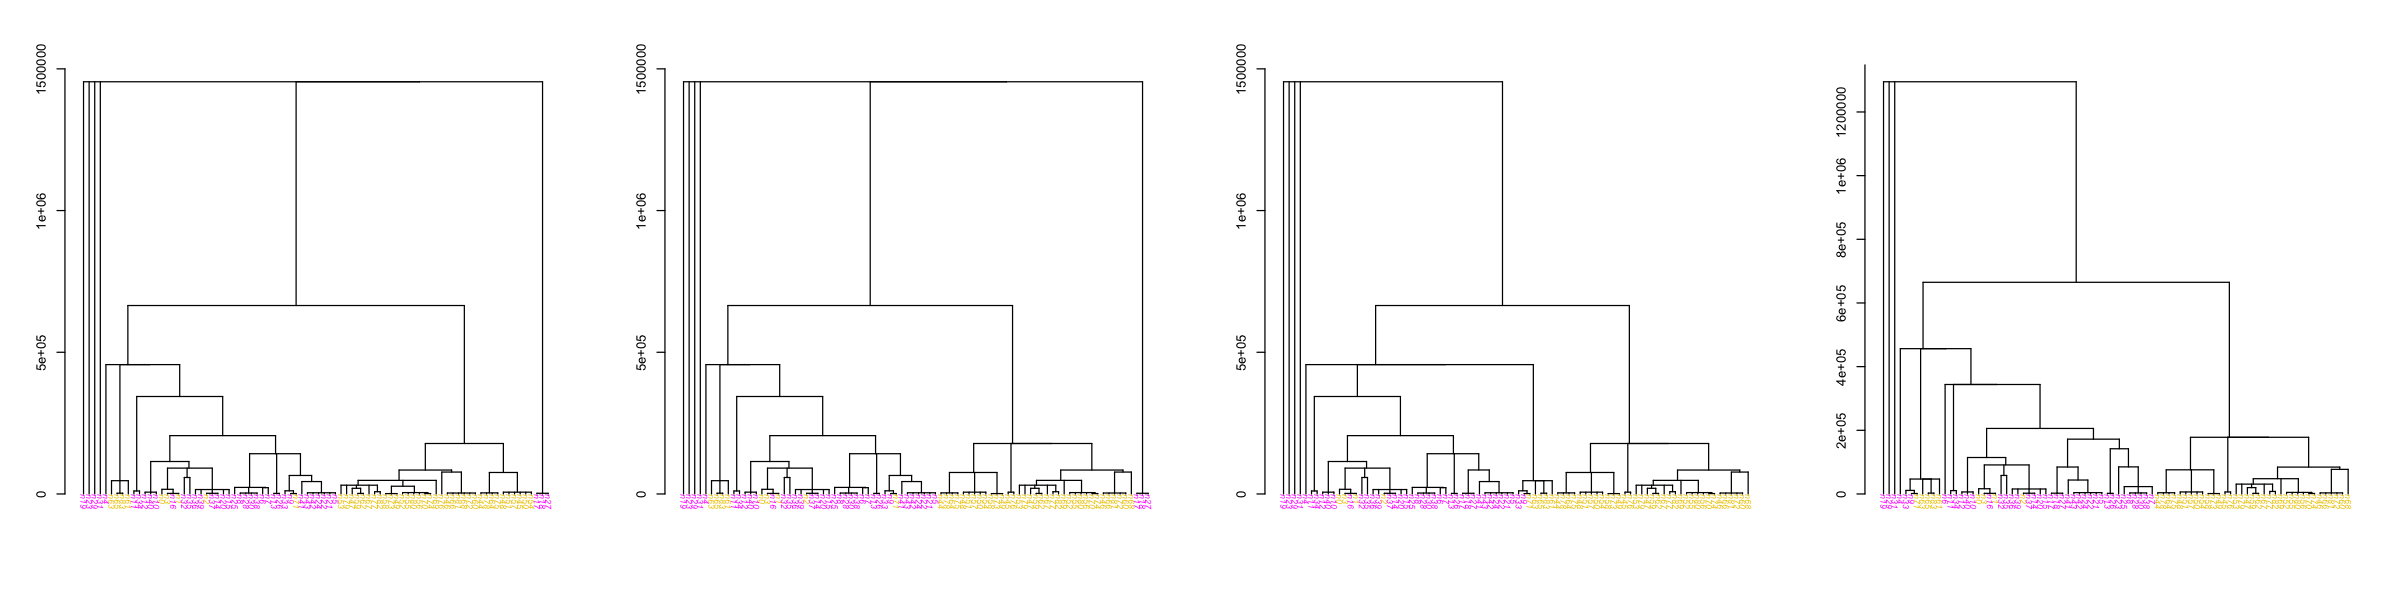

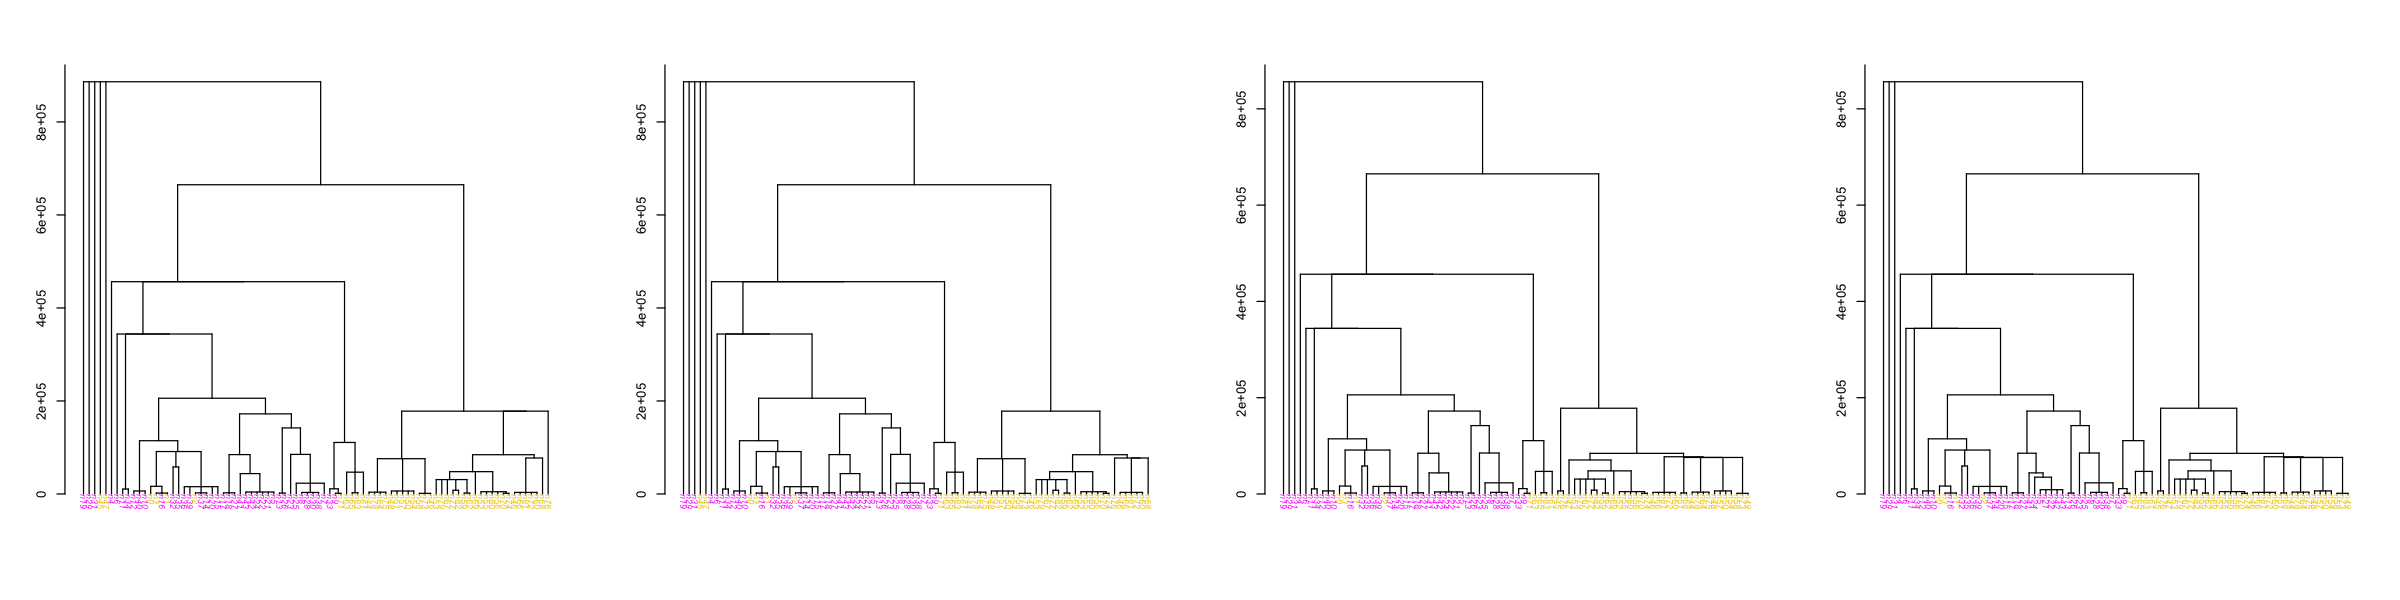

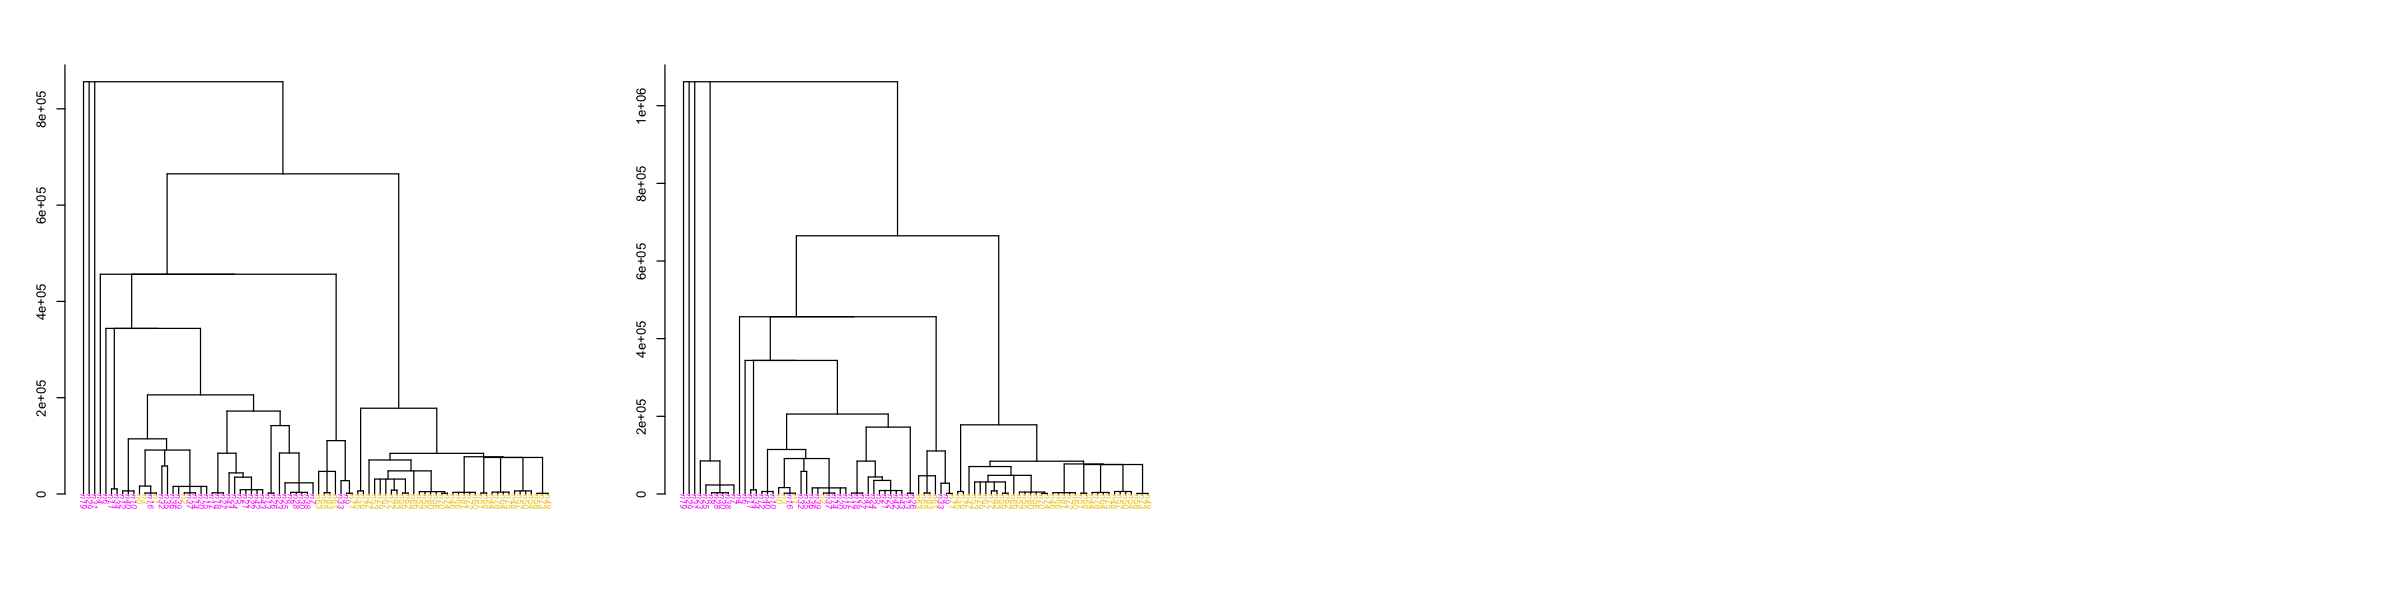

In [90]:
options(repr.plot.width=20, repr.plot.height=5)
par(mfrow=c(1,4))
for(trID in 2310:2347){
    tr = read.tree(text=ts_rosel$tree[trID])
    plot(tr, use.edge.length = T,
         tip.color = inds_col[match(tr$tip.label, inds_col$inds), "col"],
         direction = 'downwards')
    axisPhylo(2)
}

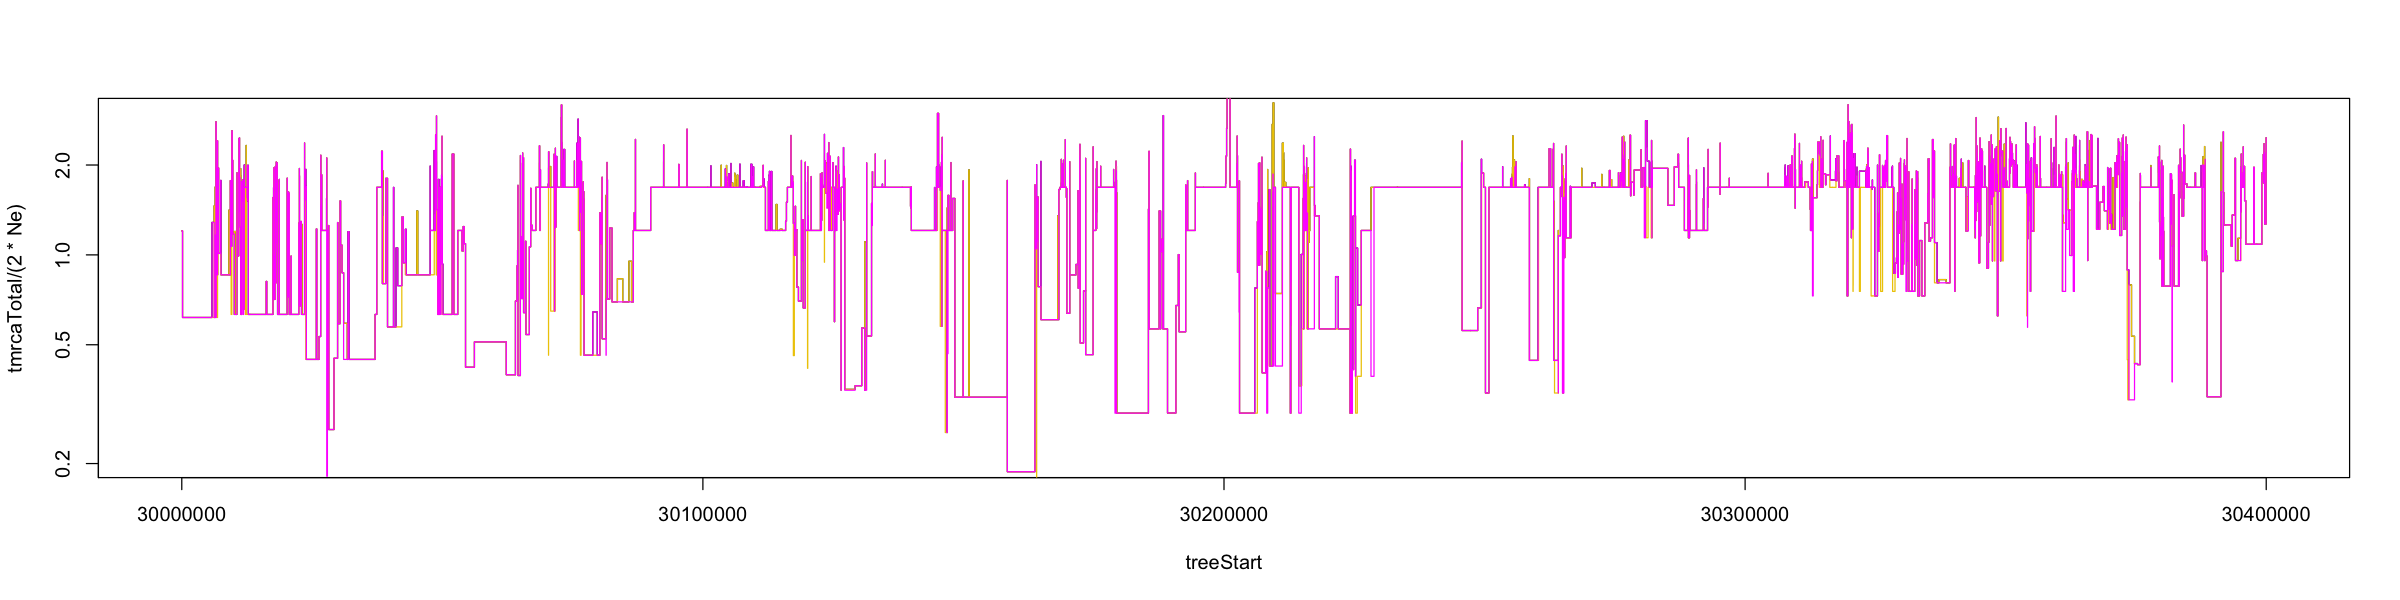

In [23]:
options(repr.plot.width=20, repr.plot.height=5)
xLimits = c(30000000, 30400000)
yLimits = c(0.2,3)
plot(tmrcaTotal/(2*Ne)~treeStart, ts_neu, type='s', xlim=xLimits, ylim=yLimits, log='y')
points(tmrcaYF3/(2*Ne)~treeStart, ts_neu, type='s', xlim=xLimits, ylim=yLimits, col='gold2')
points(tmrcaMF3/(2*Ne)~treeStart, ts_neu, type='s', xlim=xLimits, ylim=yLimits, col='magenta')

In [47]:
## tsinfer Trees in RosEl ----
#ts_rosel$treeStart = (ts_rosel$treeStart)/1e6
#ts_rosel$treeEnd = (ts_rosel$treeEnd)/1e6

ts_ros1 = ts_rosel[treeStart > Ros1[1]-1000 & treeEnd < Ros1[2]+1000]
pairTMRCAs = data.table()
tic()
for(treeID in 1:nrow(ts_ros1)){
# for(treeID in 1:10){
  cat(treeID, '\n')
  current_tree = read.tree(text = ts_ros1$tree[treeID])
  current_pairTMRCAs = get_pairwise_tmrcas(current_tree, inds_YF3, inds_MF3)
  pairTMRCAs = rbind(pairTMRCAs, current_pairTMRCAs)
}
toc()
colnames(pairTMRCAs) = c('mean_pairTMRCA_wYF3', 'median_pairTMRCA_wYF3', 'min_pairTMRCA_wYF3', 'max_pairTMRCA_wYF3',
                         'mean_pairTMRCA_wMF3', 'median_pairTMRCA_wMF3', 'min_pairTMRCA_wMF3', 'max_pairTMRCA_wMF3',
                         'mean_crosspairTMRCA', 'median_crosspairTMRCA', 'min_crosspairTMRCA', 'max_crosspairTMRCA')
str(pairTMRCAs)
# fwrite(pairTMRCAs, file = 'Downloads/pairTMRCAs_RosEl.txt', sep = '\t', row.names = F, col.names = T, quote = F)
ts_ros1 = cbind(ts_ros1, pairTMRCAs)

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
15.507 sec elapsed
Classes ‘data.table’ and 'data.frame':	38 obs. of  12 variables:
 $ mean_pairTMRCA_wYF3  : num  666986 563254 533505 440569 439497 ...
 $ median_pairTMRCA_wYF3: num  456451 456451 456451 456451 456451 ...
 $ min_pairTMRCA_wYF3   : num  1965 1965 1965 1965 1965 ...
 $ max_pairTMRCA_wYF3   : num  1222684 1222684 1222684 1222684 1222684 ...
 $ mean_pairTMRCA_wMF3  : num  282937 282937 282937 253981 253981 ...
 $ median_pairTMRCA_wMF3: num  178093 178093 178093 178093 178093 ...
 $ min_pairTMRCA_wMF3   : num  1368 1368 1368 1368 1368 ...
 $ max_pairTMRCA_wMF3   : num  1222684 1222684 1222684 664933 664933 ...
 $ mean_crosspairTMRCA  : num  776120 736942 724109 668958 669192 ...
 $ median_crosspairTMRCA: num  664933 664933 664933 664933 664933 ...
 $ min_crosspairTMRCA   : num  1463 1463 1463 1463 1463 ...
 $ max_crosspairTMRCA   :

In [ ]:
str(ts_ros1) #10759 trees
windowSize = 
ts_ros1_wins = get_windowed_tmrcas(ts_ros1, start=52800000, end=53200000, windowSize, stepSize)
str(ts_ros1_wins)

In [49]:
str(ts_ros1)

Classes ‘data.table’ and 'data.frame':	38 obs. of  20 variables:
 $ treeStart            : num  52888460 52888492 52888593 52888730 52888900 ...
 $ treeEnd              : num  52888492 52888593 52888730 52888900 52889039 ...
 $ treeSpan             : num  32 101 137 170 139 39 73 32 249 71 ...
 $ tree                 : chr  "(n4:1222683.65382736525498331,n19:1222683.65382736525498331,n29:1222683.65382736525498331,n31:1222683.653827365"| __truncated__ "(n4:1222683.65382736525498331,n19:1222683.65382736525498331,n29:1222683.65382736525498331,n31:1222683.653827365"| __truncated__ "(n19:1222683.65382736525498331,n29:1222683.65382736525498331,n31:1222683.65382736525498331,(((n11:195226.312272"| __truncated__ "(n19:1222683.65382736525498331,n29:1222683.65382736525498331,n31:1222683.65382736525498331,((n11:195226.3122724"| __truncated__ ...
 $ treeID               : int  2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 ...
 $ tmrcaTotal           : num  1222684 1222684 1222684 1222684 122268

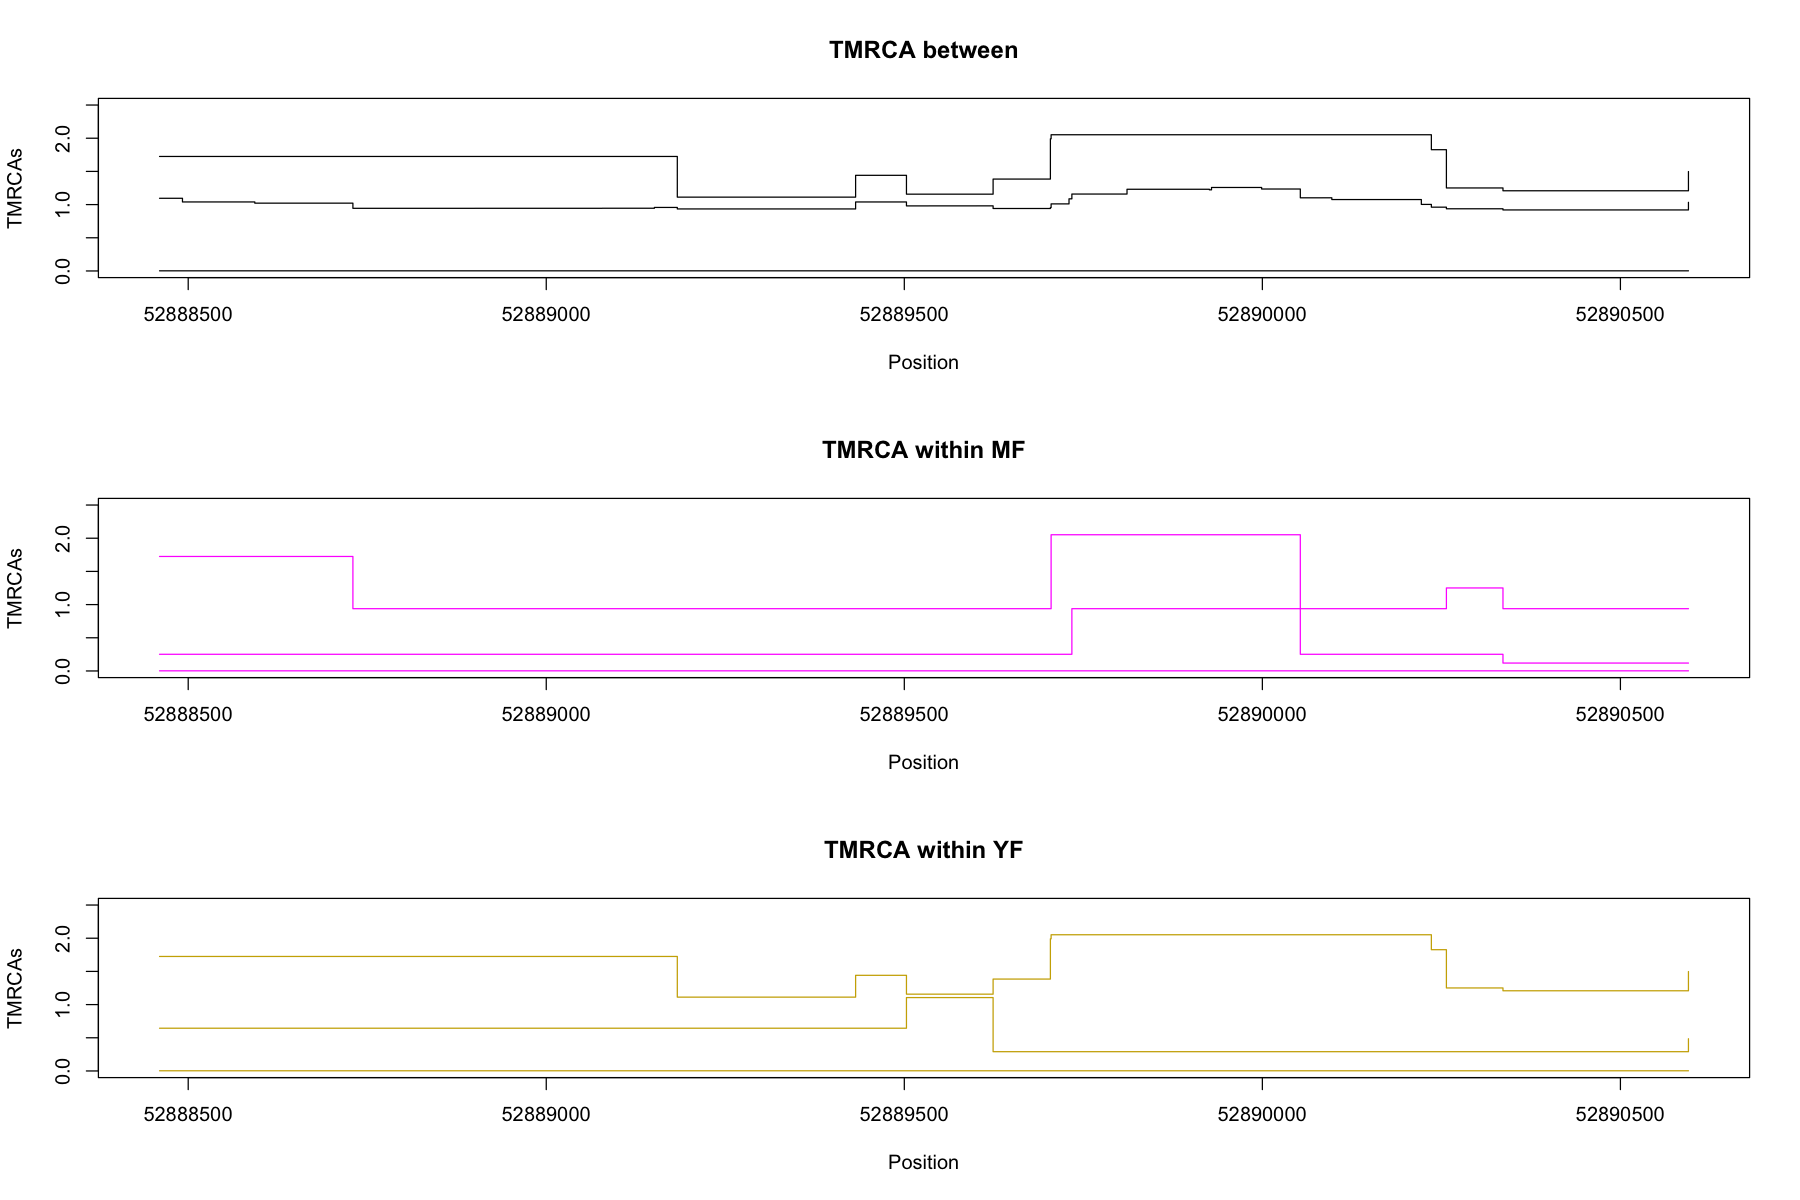

In [95]:
options(repr.plot.width=15, repr.plot.height=10)
xLabel = 'Position'
yLabel = 'TMRCAs'

par(mfrow=c(3,1), cex =1)
plot(max_crosspairTMRCA/(2*Ne)~treeStart, ts_ros1, type='s', ylim=c(0,2.5), xlab=xLabel, ylab=yLabel, main='TMRCA between')
points(mean_crosspairTMRCA/(2*Ne)~treeStart, ts_ros1, type='s')
points(min_crosspairTMRCA/(2*Ne)~treeStart, ts_ros1, type='s')

plot(max_pairTMRCA_wMF3/(2*Ne)~treeStart, ts_ros1, type='s', ylim=c(0,2.5), xlab=xLabel, ylab=yLabel, main='TMRCA within MF', col='magenta')
points(median_pairTMRCA_wMF3/(2*Ne)~treeStart, ts_ros1, type='s', col='magenta')
points(min_pairTMRCA_wMF3/(2*Ne)~treeStart, ts_ros1, type='s', col='magenta')

plot(max_pairTMRCA_wYF3/(2*Ne)~treeStart, ts_ros1, type='s', ylim=c(0,2.5), xlab=xLabel, ylab=yLabel, main='TMRCA within YF', col='gold3')
points(median_pairTMRCA_wYF3/(2*Ne)~treeStart, ts_ros1, type='s', col='gold3')
points(min_pairTMRCA_wYF3/(2*Ne)~treeStart, ts_ros1, type='s', col='gold3')

In [75]:
gnn = gnn[order(Longitude),]

In [76]:
str(gnn)

Classes ‘data.table’ and 'data.frame':	84 obs. of  27 variables:
 $ PlantID_longFormat_refVersion: chr  "10xNEW-Plate10-86_Am_Pla_pb3677_v3.5" "10xNEW-Plate10-86_Am_Pla_pb3677_v3.5" "10xNEW-Plate10-4_Am_Pla_pb0883_v3.5" "10xNEW-Plate10-4_Am_Pla_pb0883_v3.5" ...
 $ Sample node                  : int  78 79 46 47 52 53 72 73 68 69 ...
 $ name                         : chr  "yYe" "yYe" "yYe" "yYe" ...
 $ mFR                          : num  0.4061 0.4167 0.0782 0.2177 0.0972 ...
 $ yYe                          : num  0.594 0.583 0.922 0.782 0.903 ...
 $ PlantID                      : chr  "pb3677" "pb3677" "pb0883" "pb0883" ...
 $ PlantID_UPPER                : chr  "PB3677" "PB3677" "PB0883" "PB0883" ...
 $ PlantID_LongFormat           : chr  "2x-N710-82_Am_Pla_pb3677" "2x-N710-82_Am_Pla_pb3677" "2x-N710-4_Am_Pla_pb0883" "2x-N710-4_Am_Pla_pb0883" ...
 $ Batch                        : chr  "10xNEW" "10xNEW" "10xNEW" "10xNEW" ...
 $ Batch_PlantID                : chr  "10xNEW_PB3677" "10xNE

In [78]:
barplot(gnn[,4:5])

ERROR: Error in barplot.default(gnn[, 4:5]): 'height' must be a vector or a matrix


In [81]:
t(gnn[,4:5])

mFR,0.406142,0.4167368,0.07822042,0.2177484,0.09722987,0.1157526,0.1380324,0.09751689,0.0990628,0.1598609,⋯,0.8979488,0.8449226,0.8146069,0.8703886,0.723809,0.8005103,0.7943112,0.5692257,0.7112681,0.6691016
yYe,0.593858,0.5832632,0.92177959,0.7822516,0.90277013,0.8842474,0.8619676,0.90248311,0.9009372,0.8401391,⋯,0.1020512,0.1550774,0.1853931,0.1296114,0.276191,0.1994897,0.2056888,0.4307743,0.2887319,0.3308984


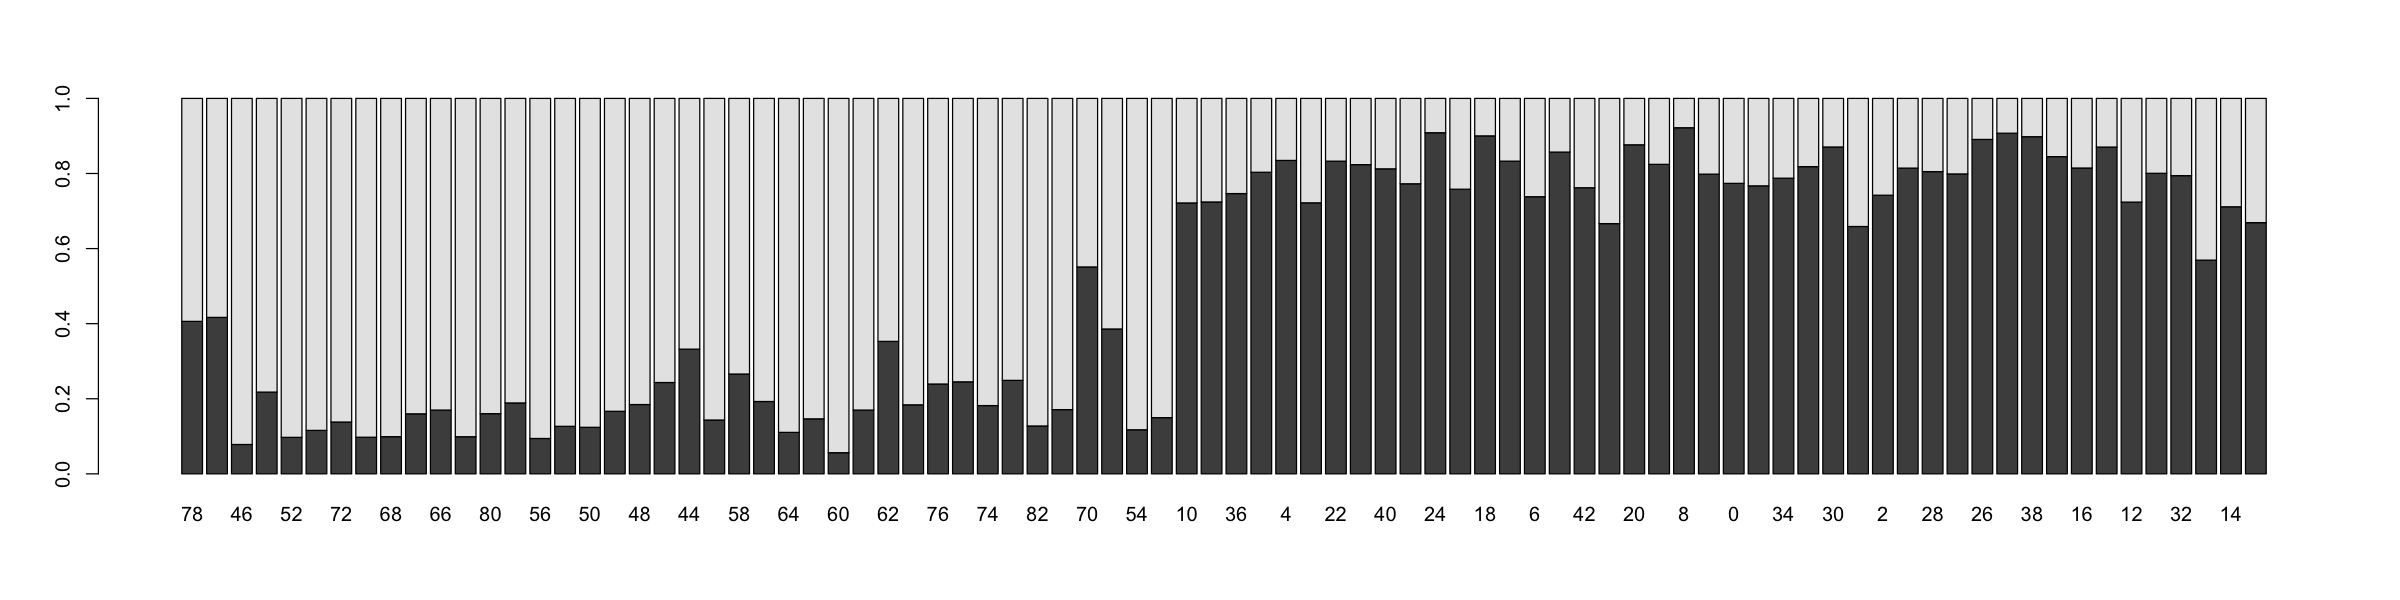

In [84]:
options(repr.plot.width = 20, repr.plot.height=5)
barplot(t(gnn[,4:5]), names.arg = gnn$`Sample node`)

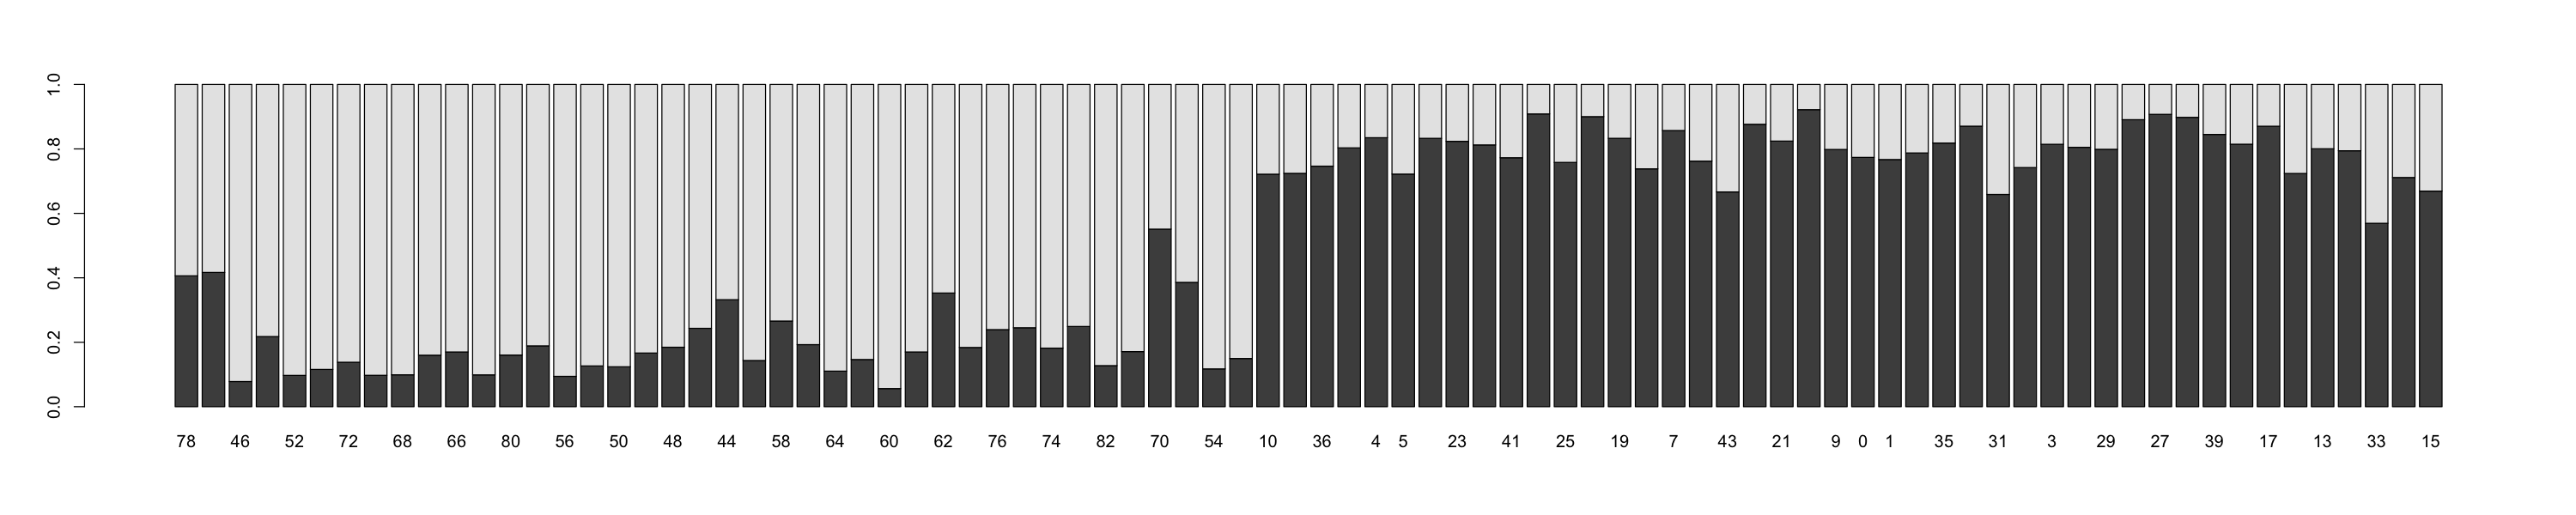

In [85]:
options(repr.plot.width = 25, repr.plot.height=5)

barplot(t(gnn[,4:5]), names.arg = gnn$`Sample node`)

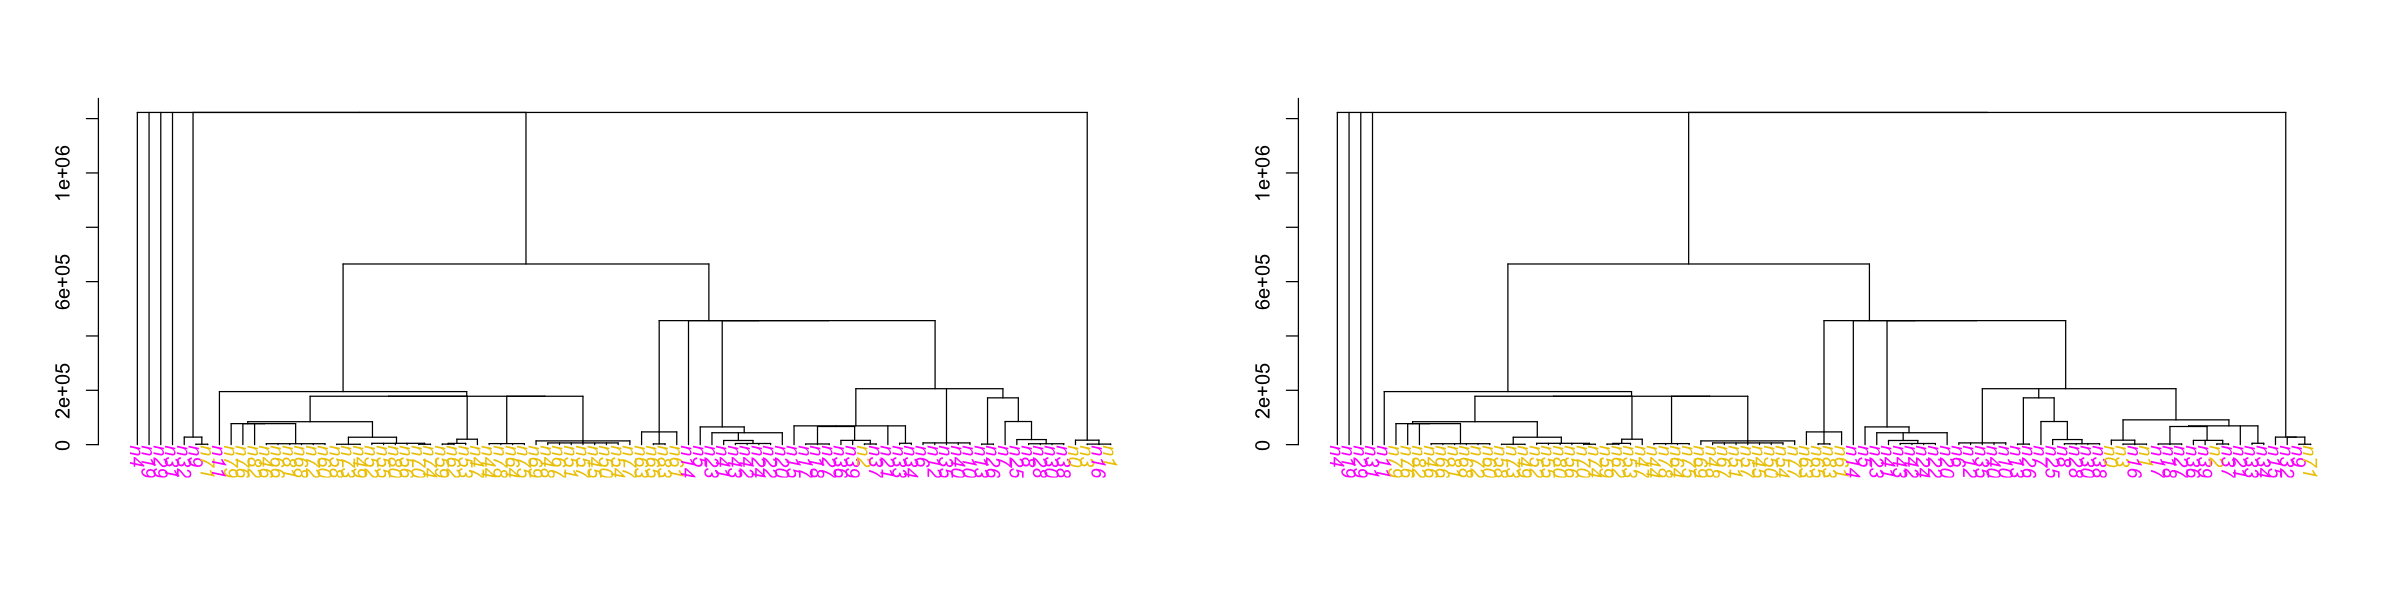

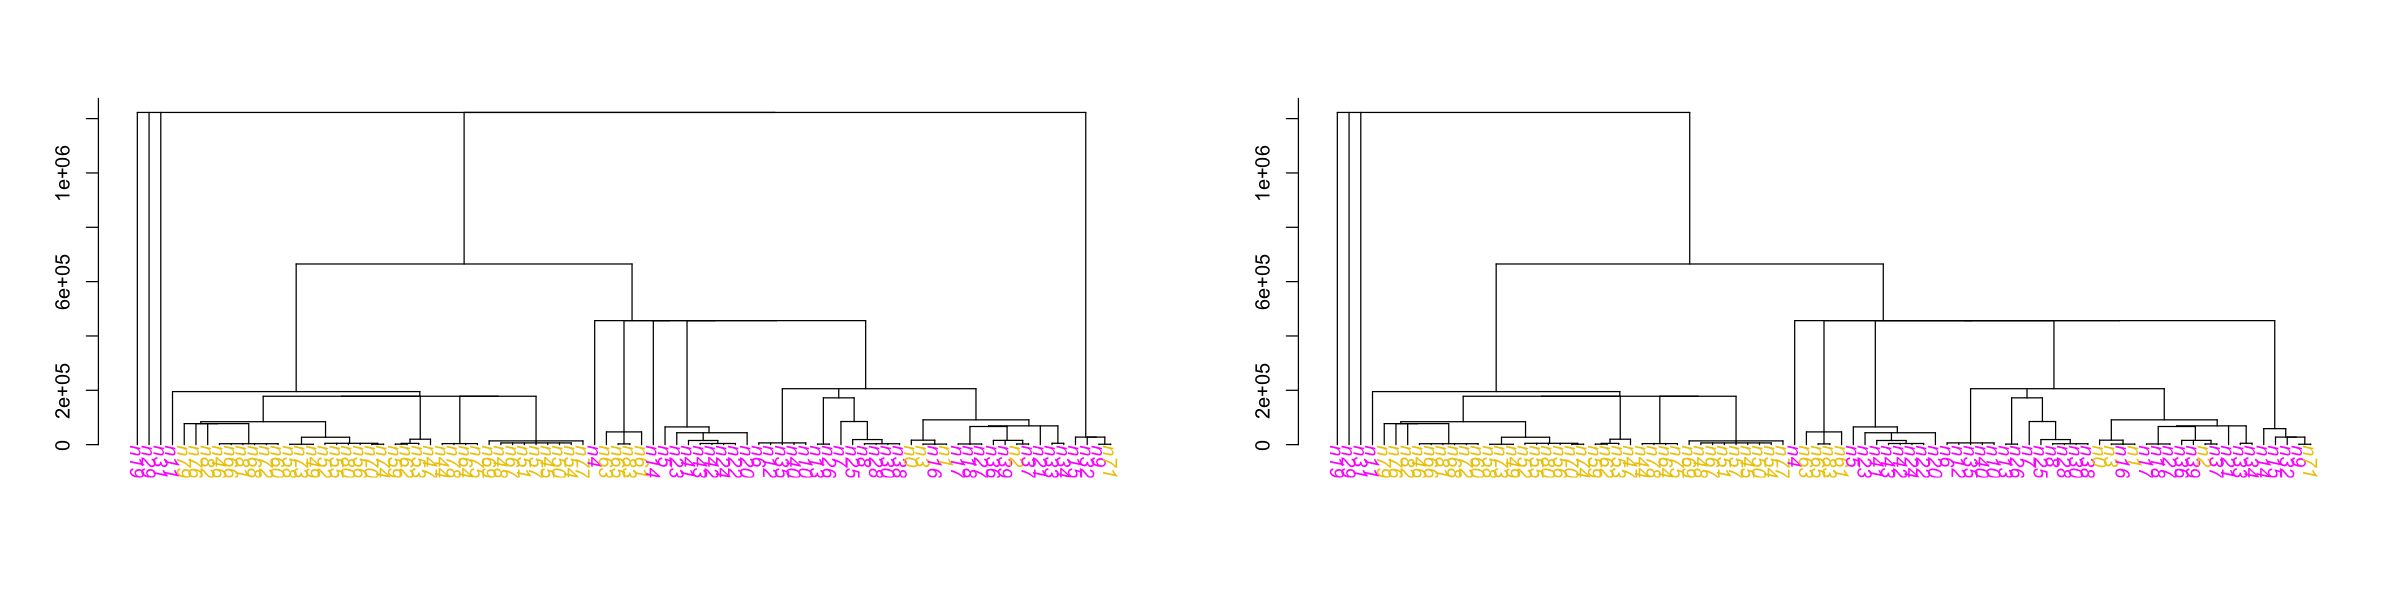

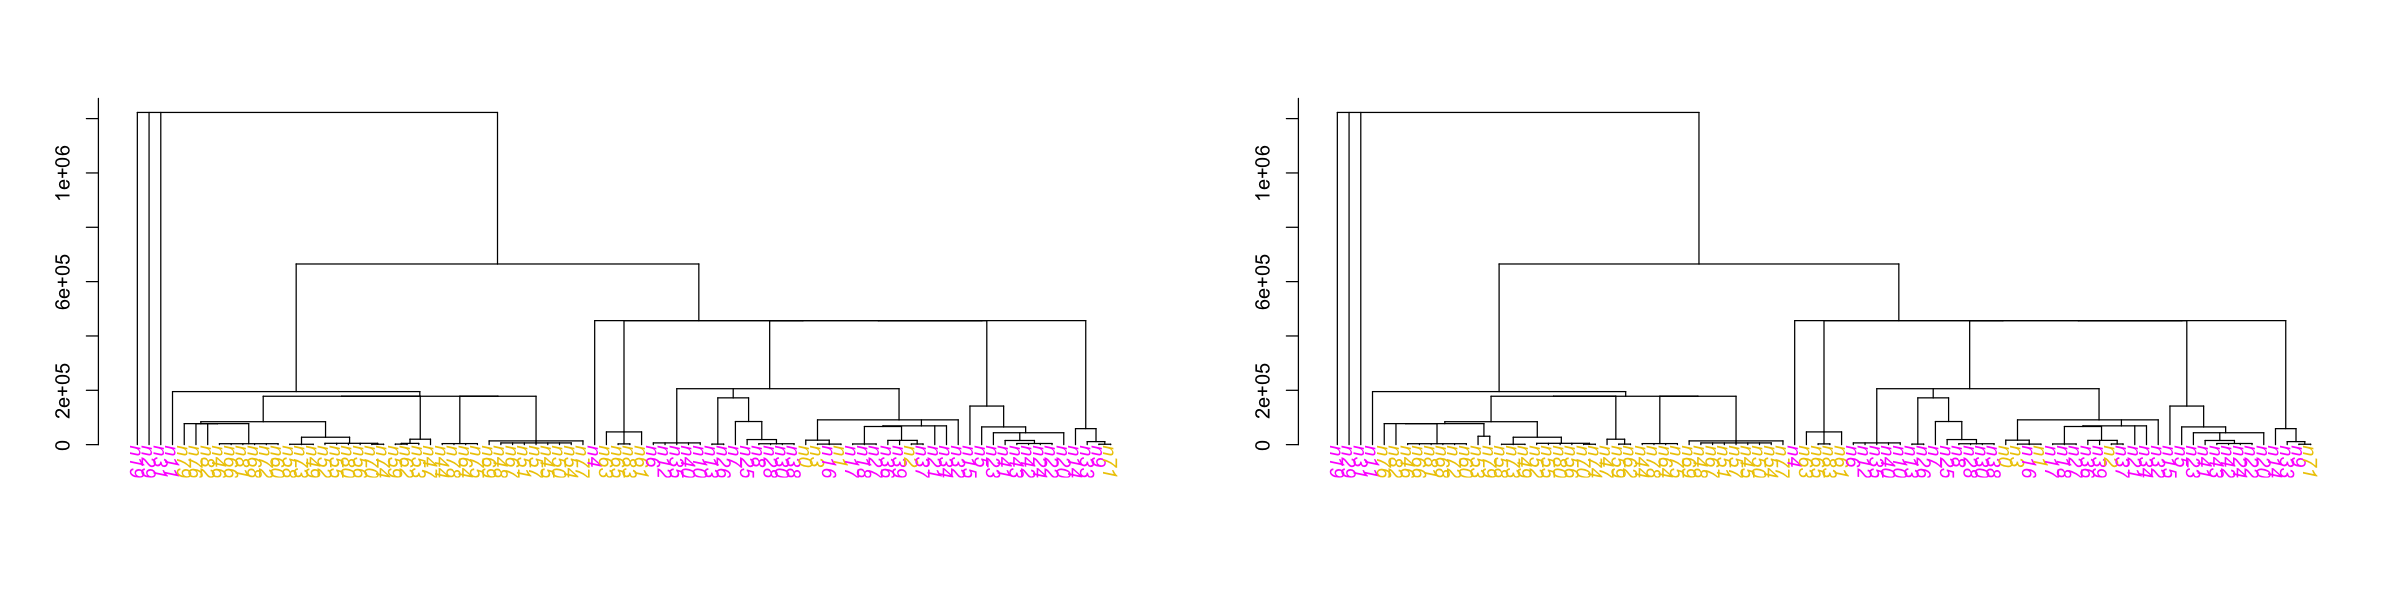

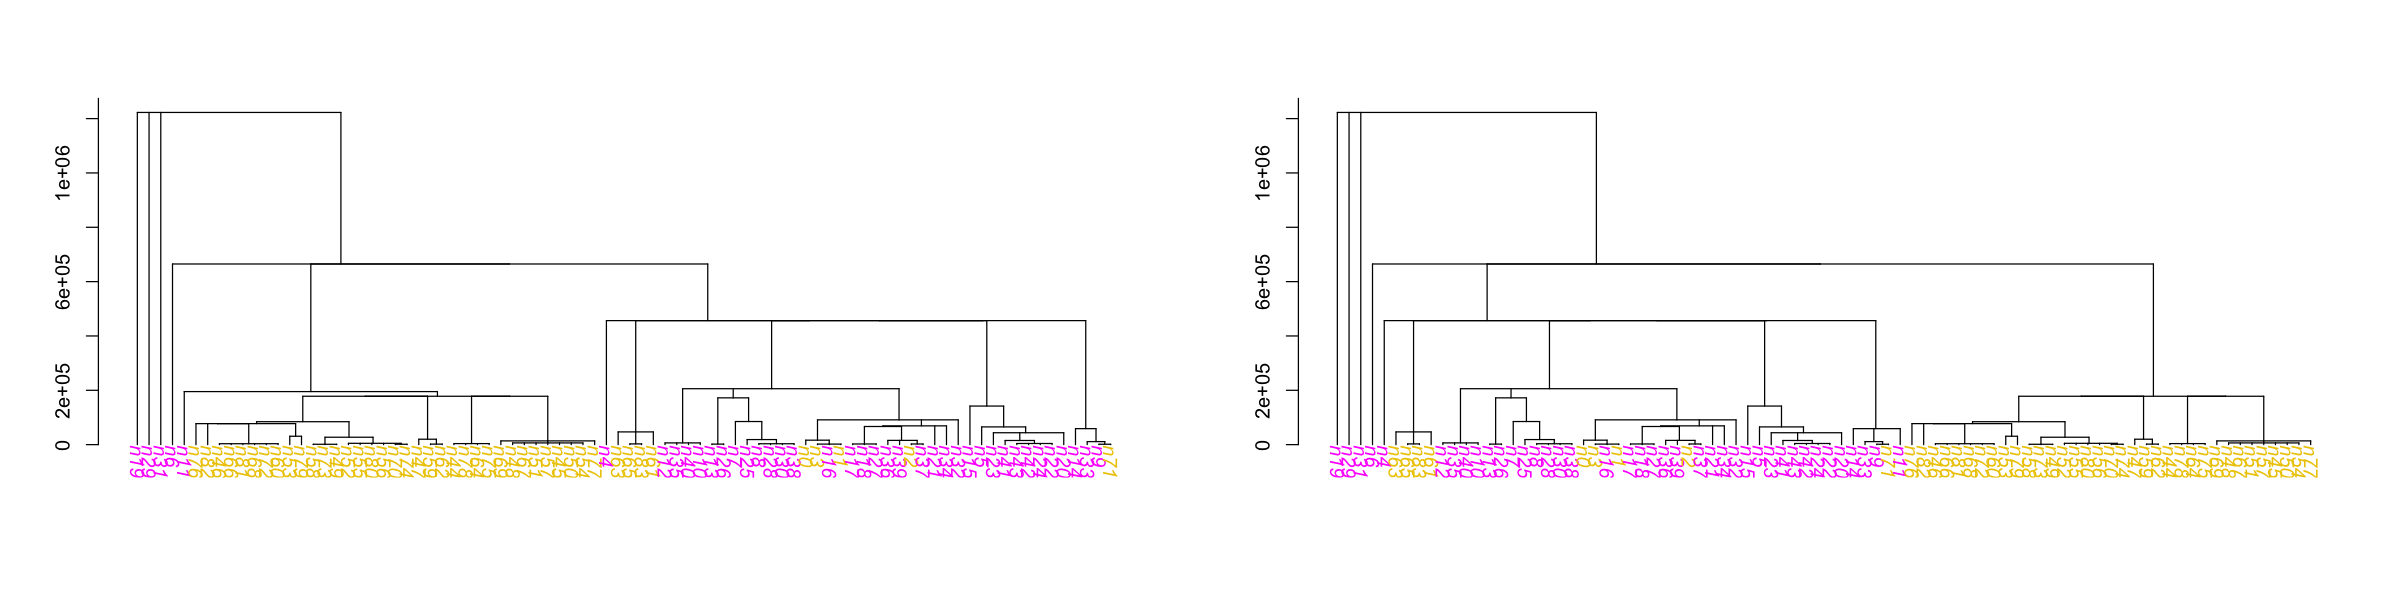

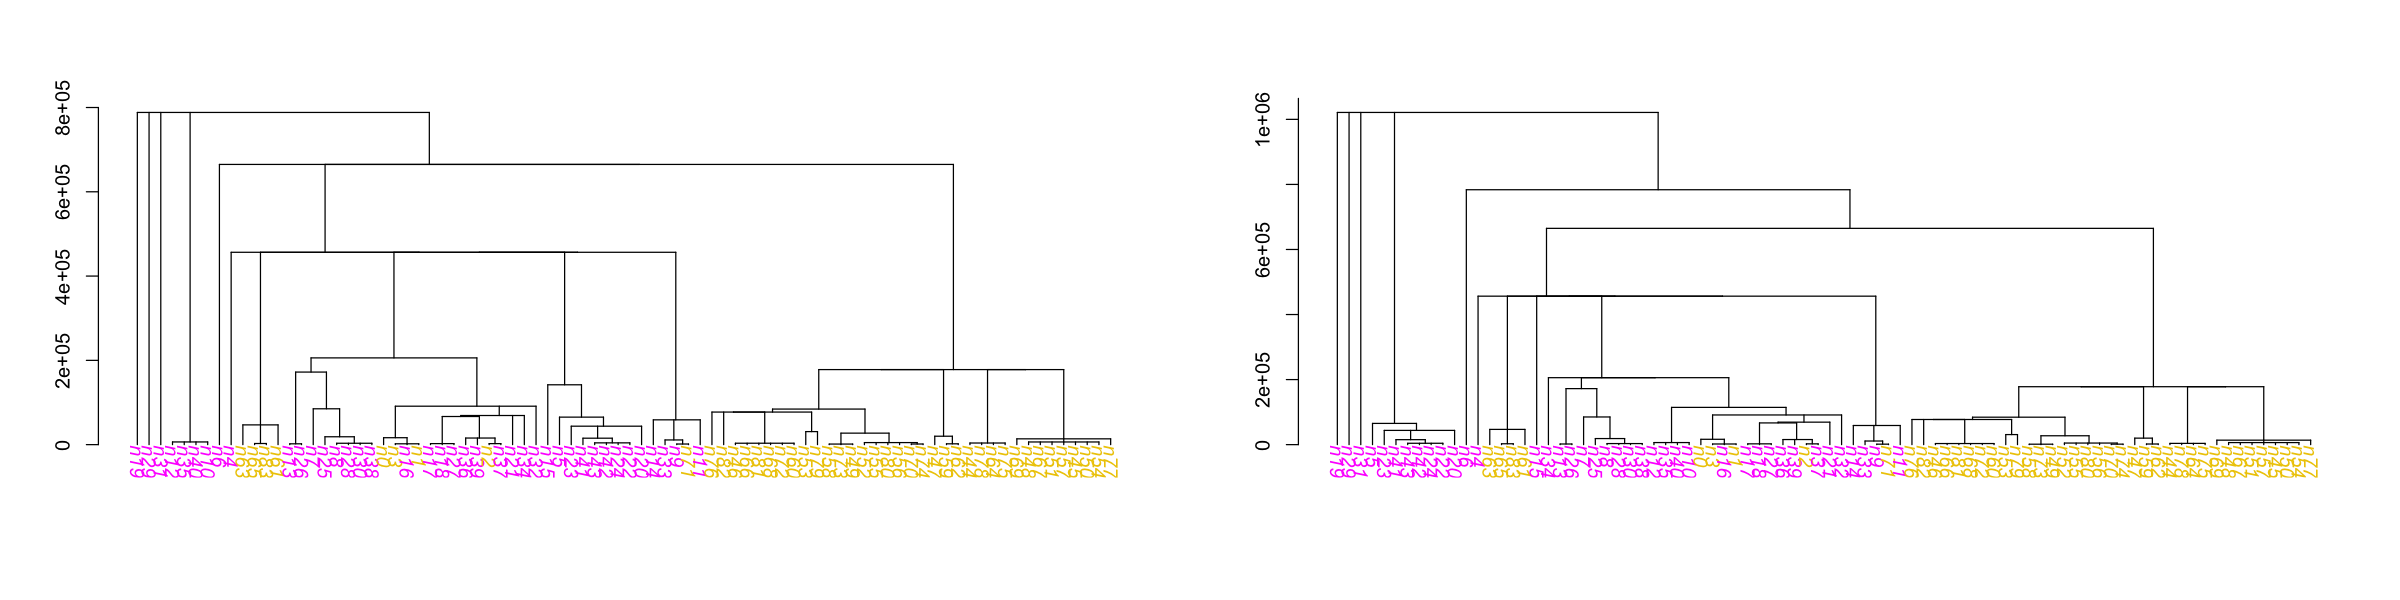

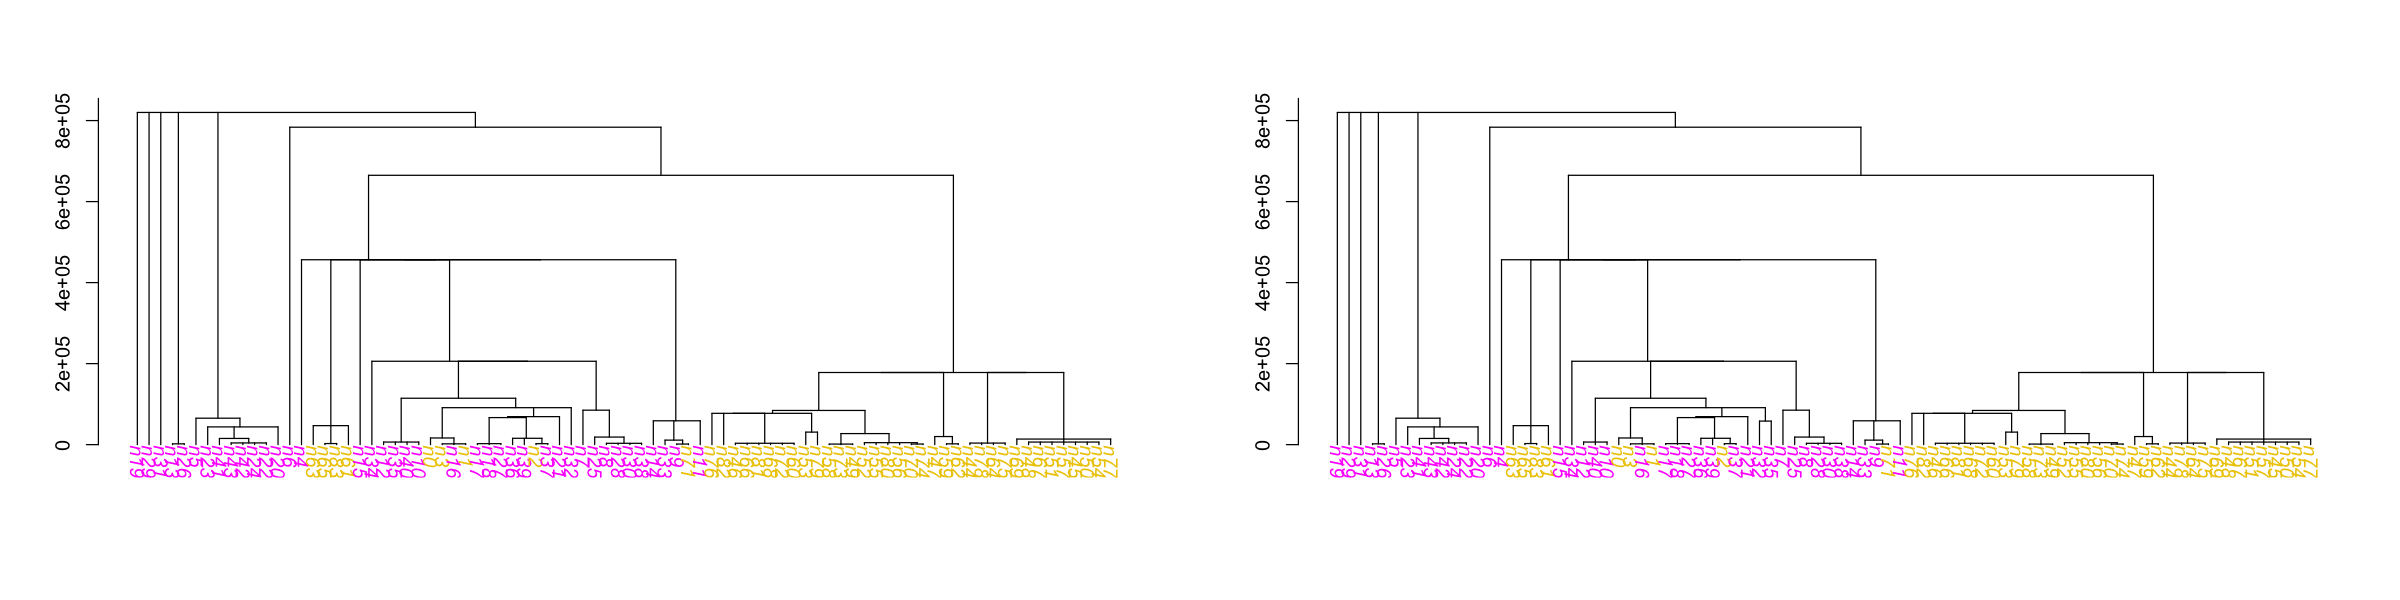

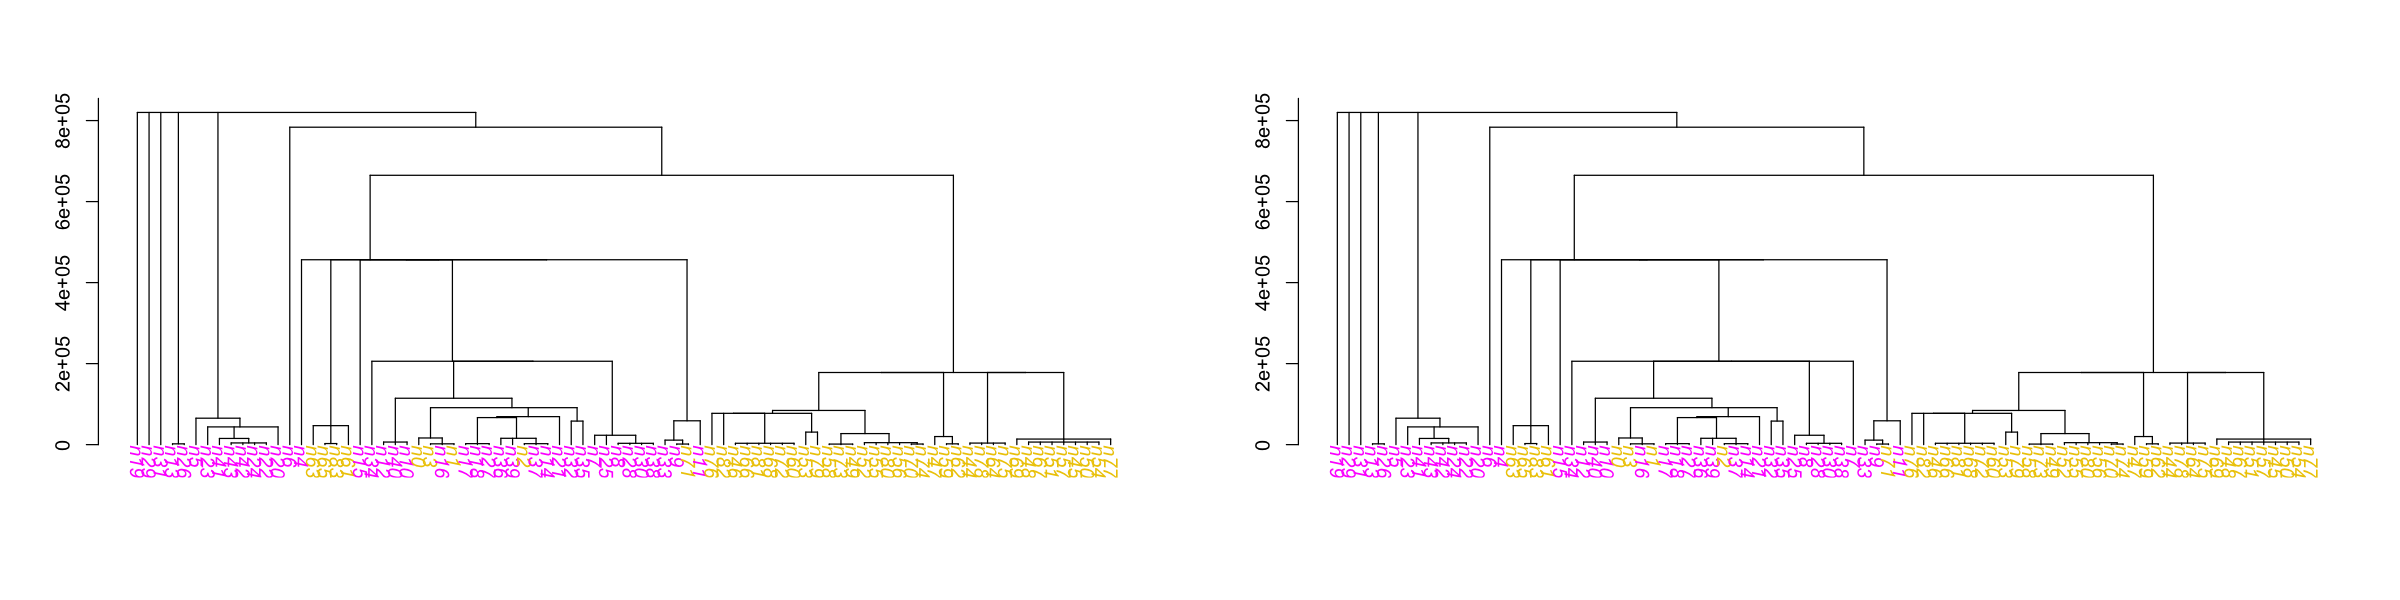

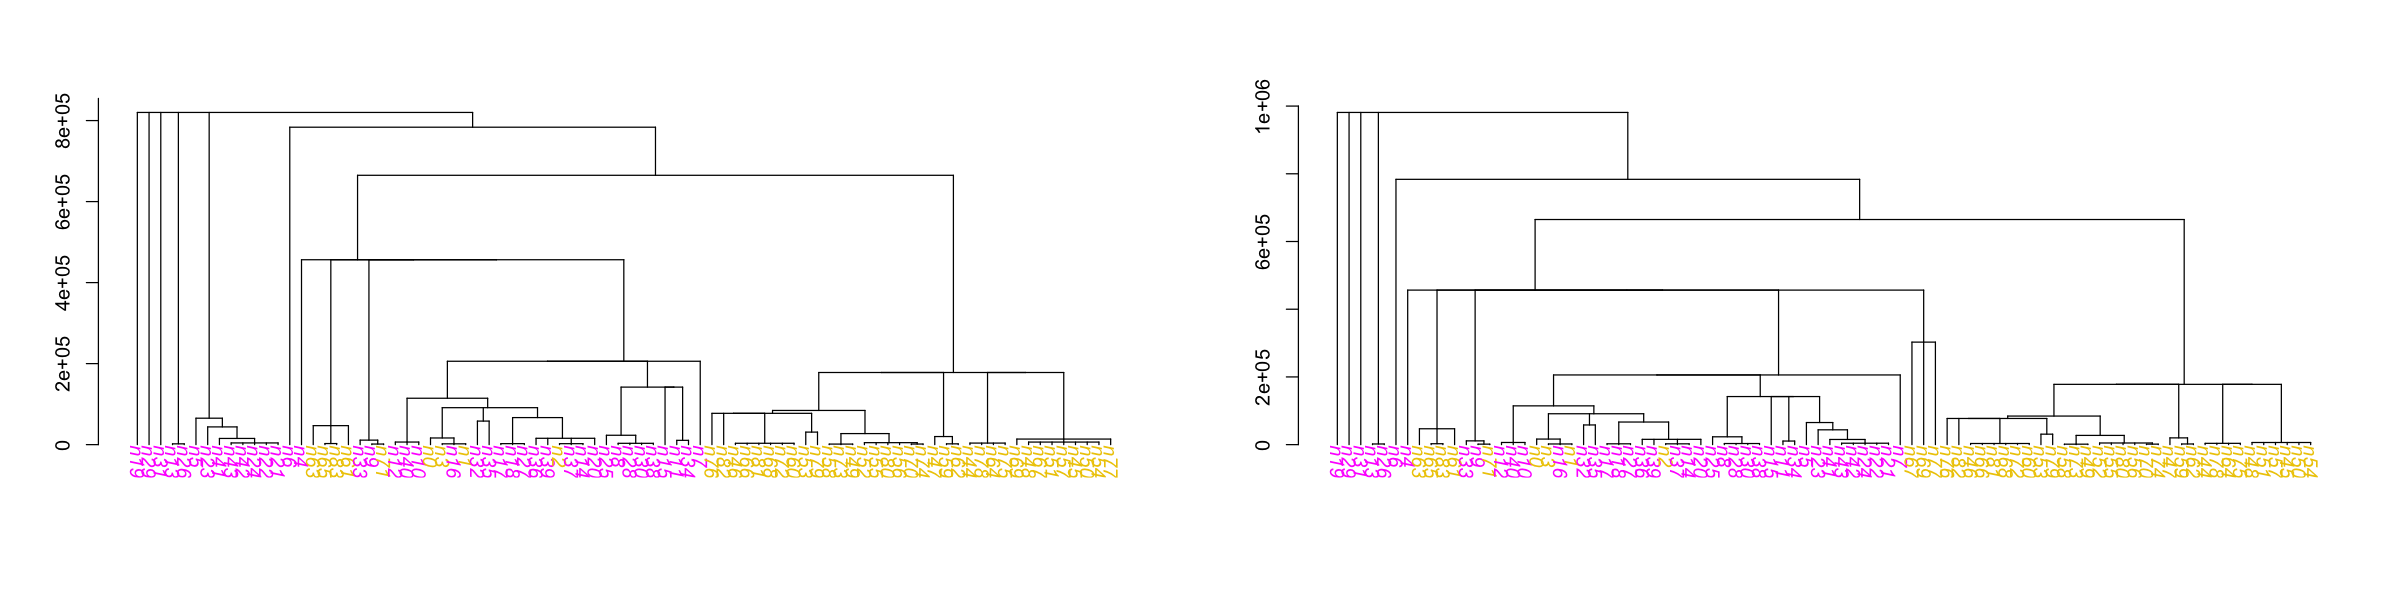

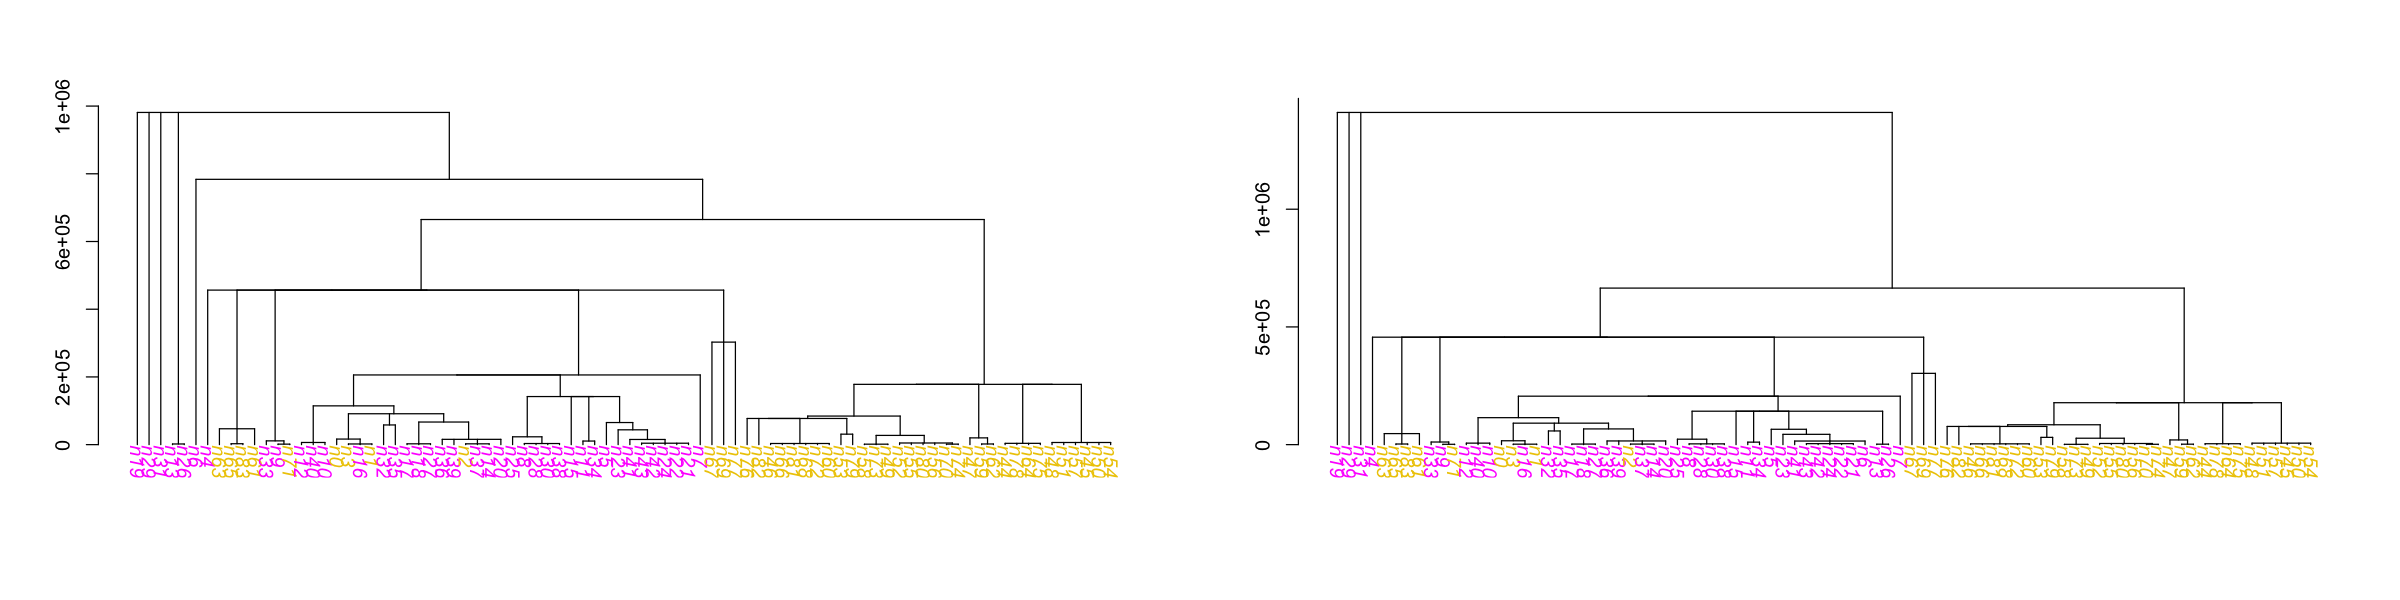

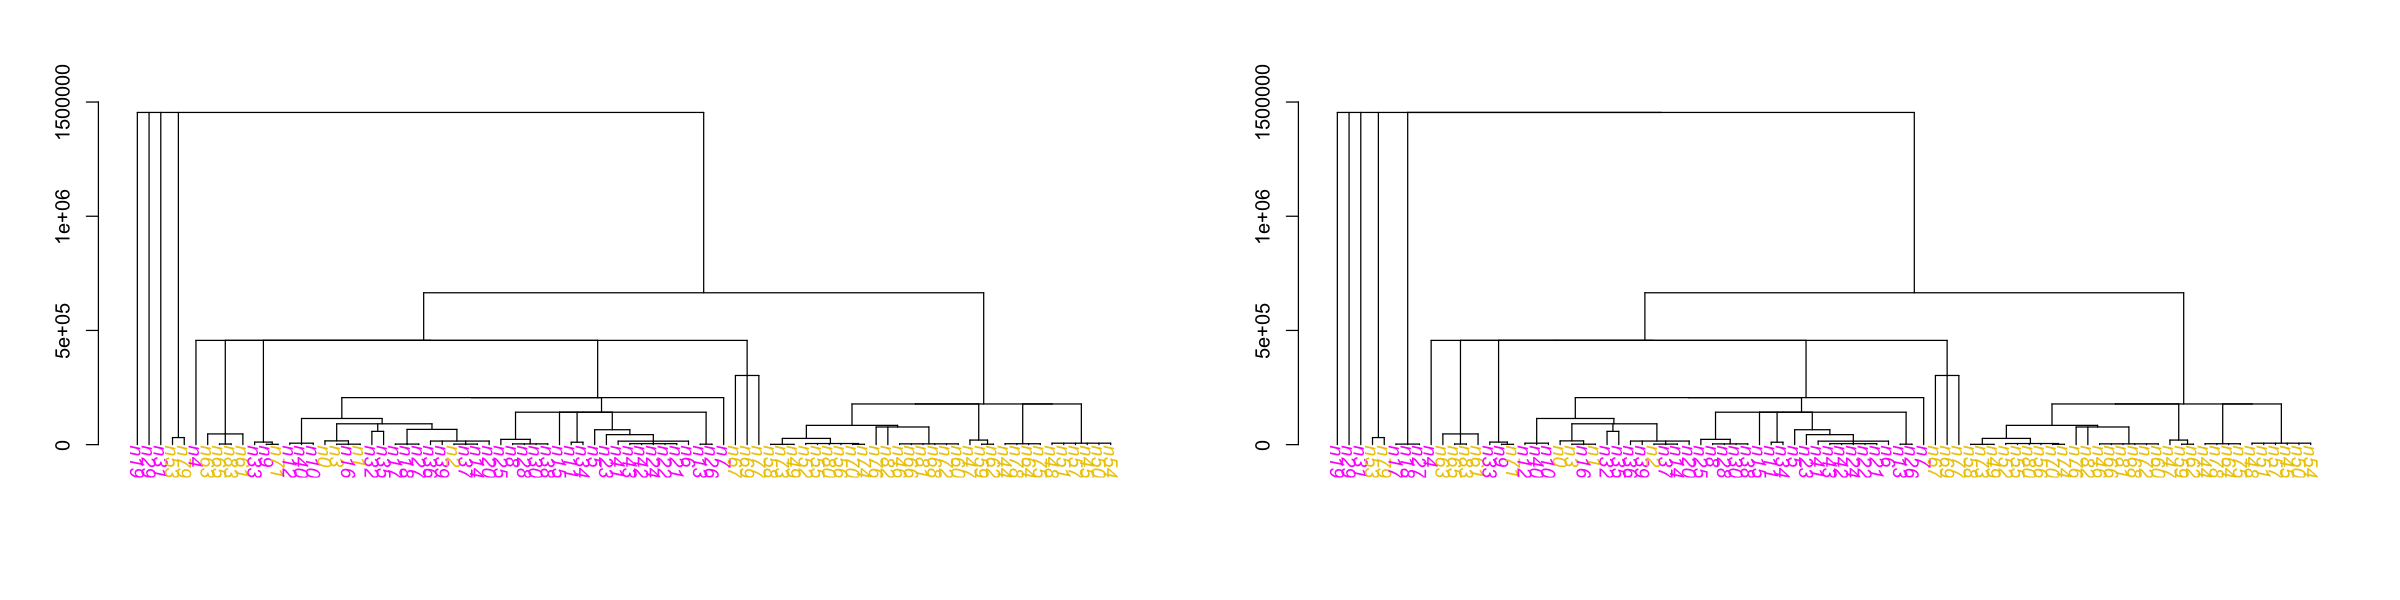

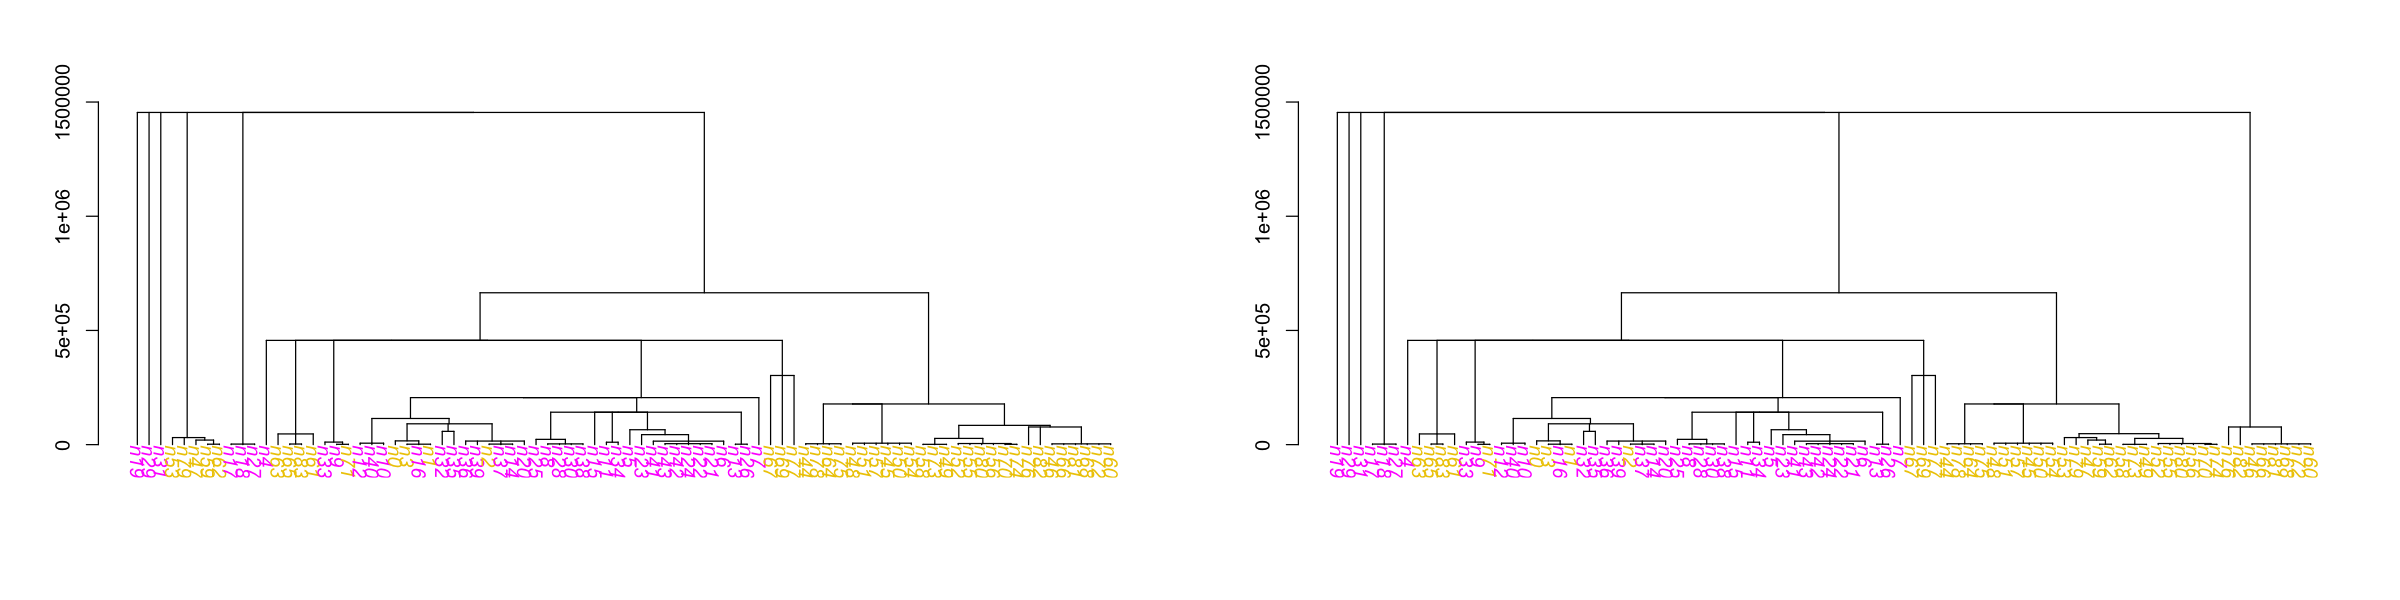

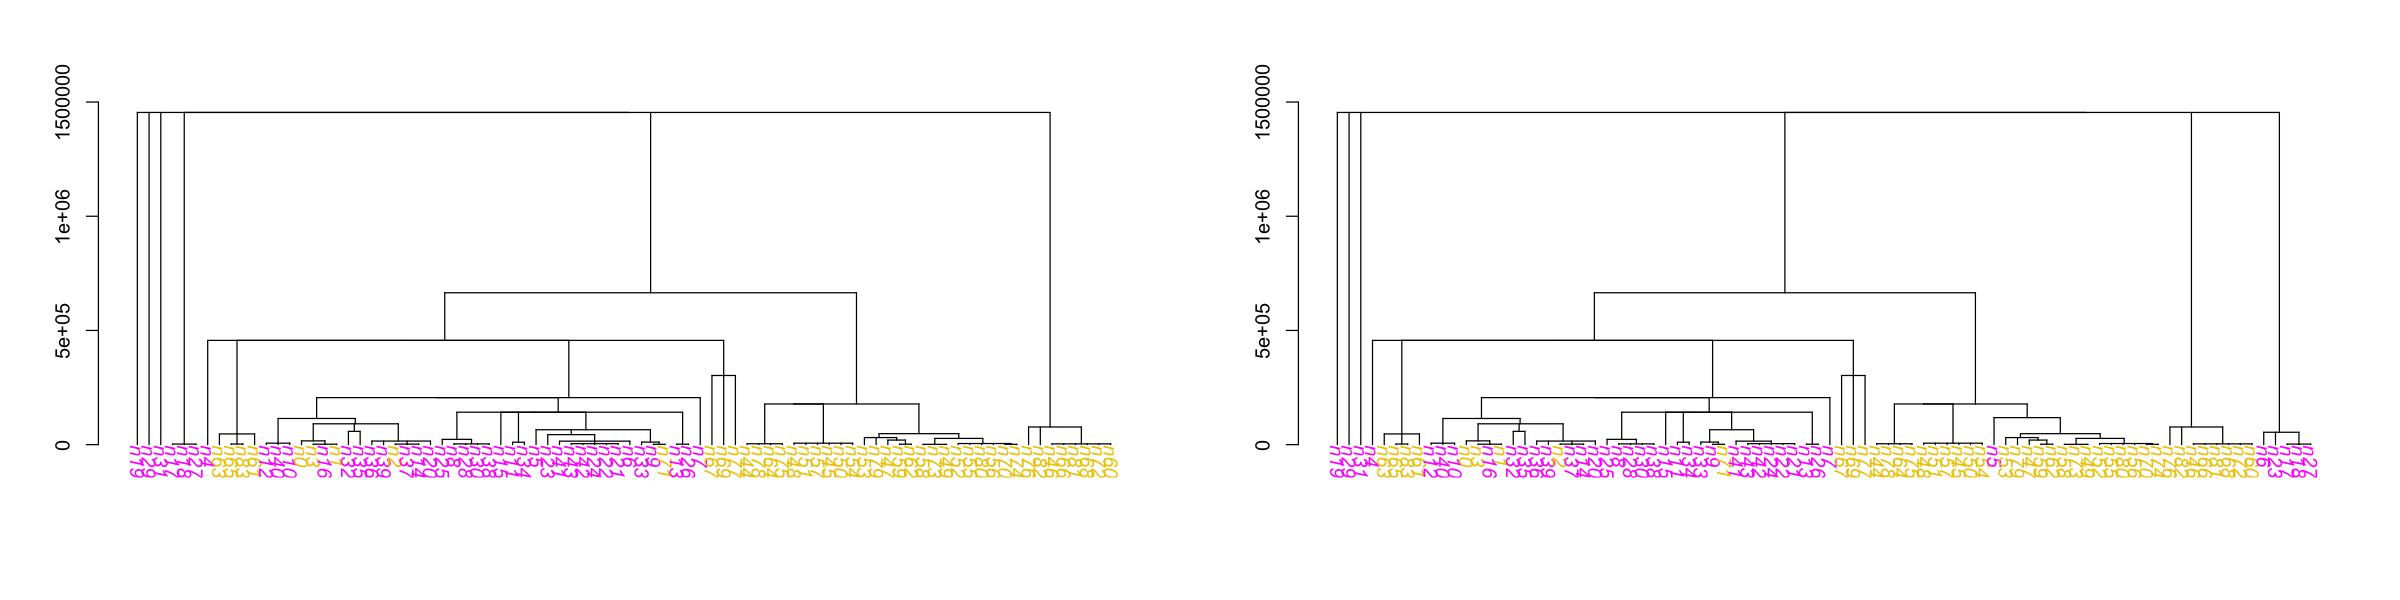

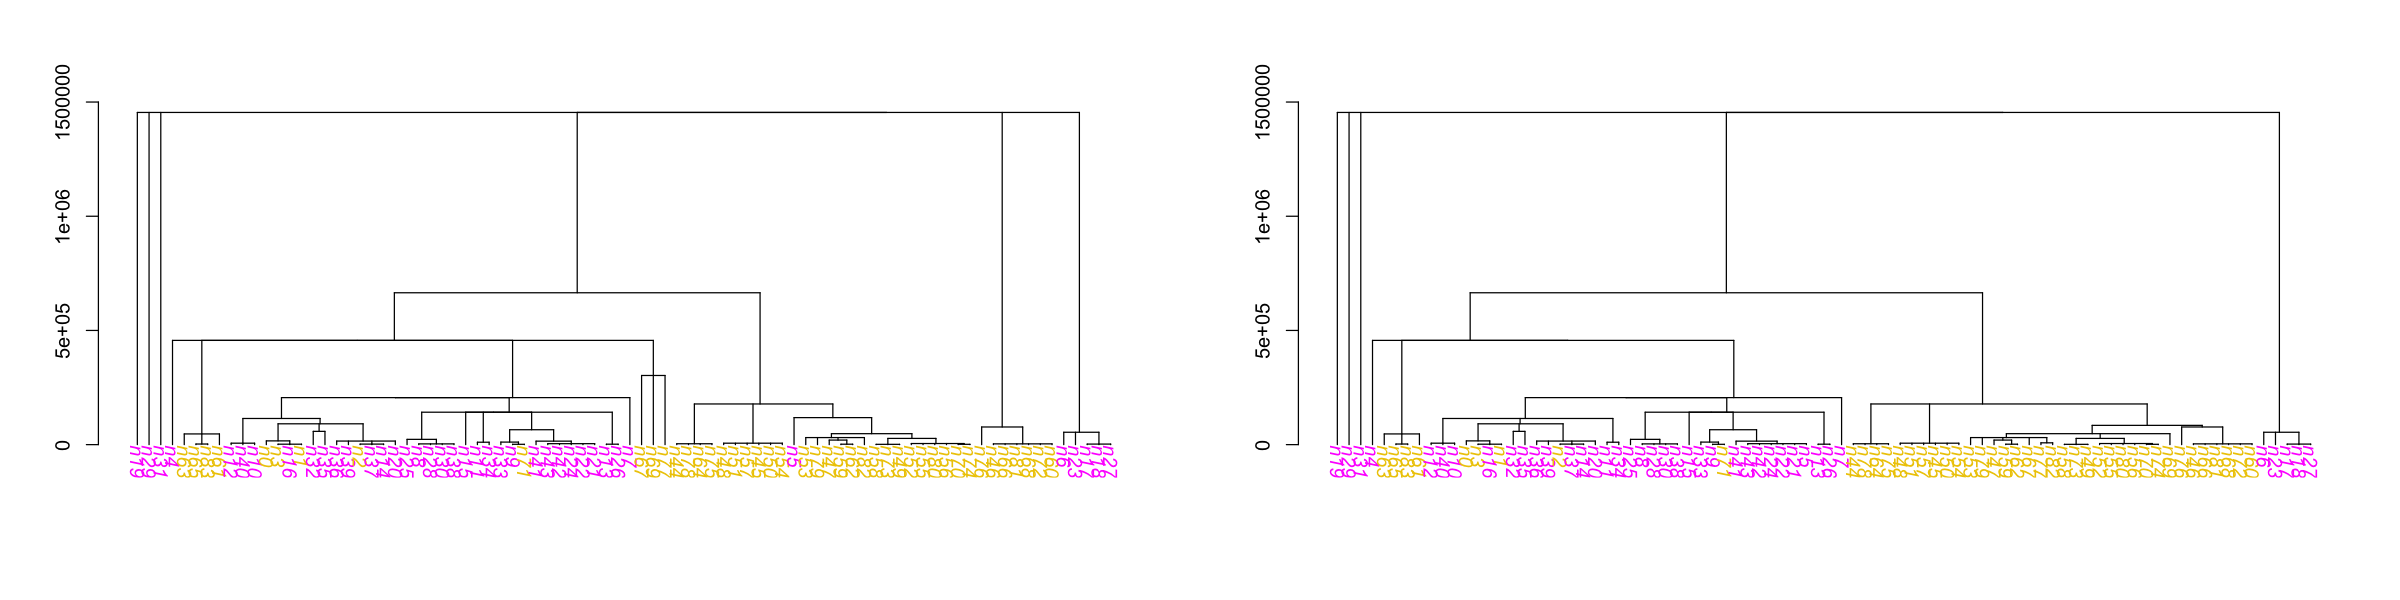

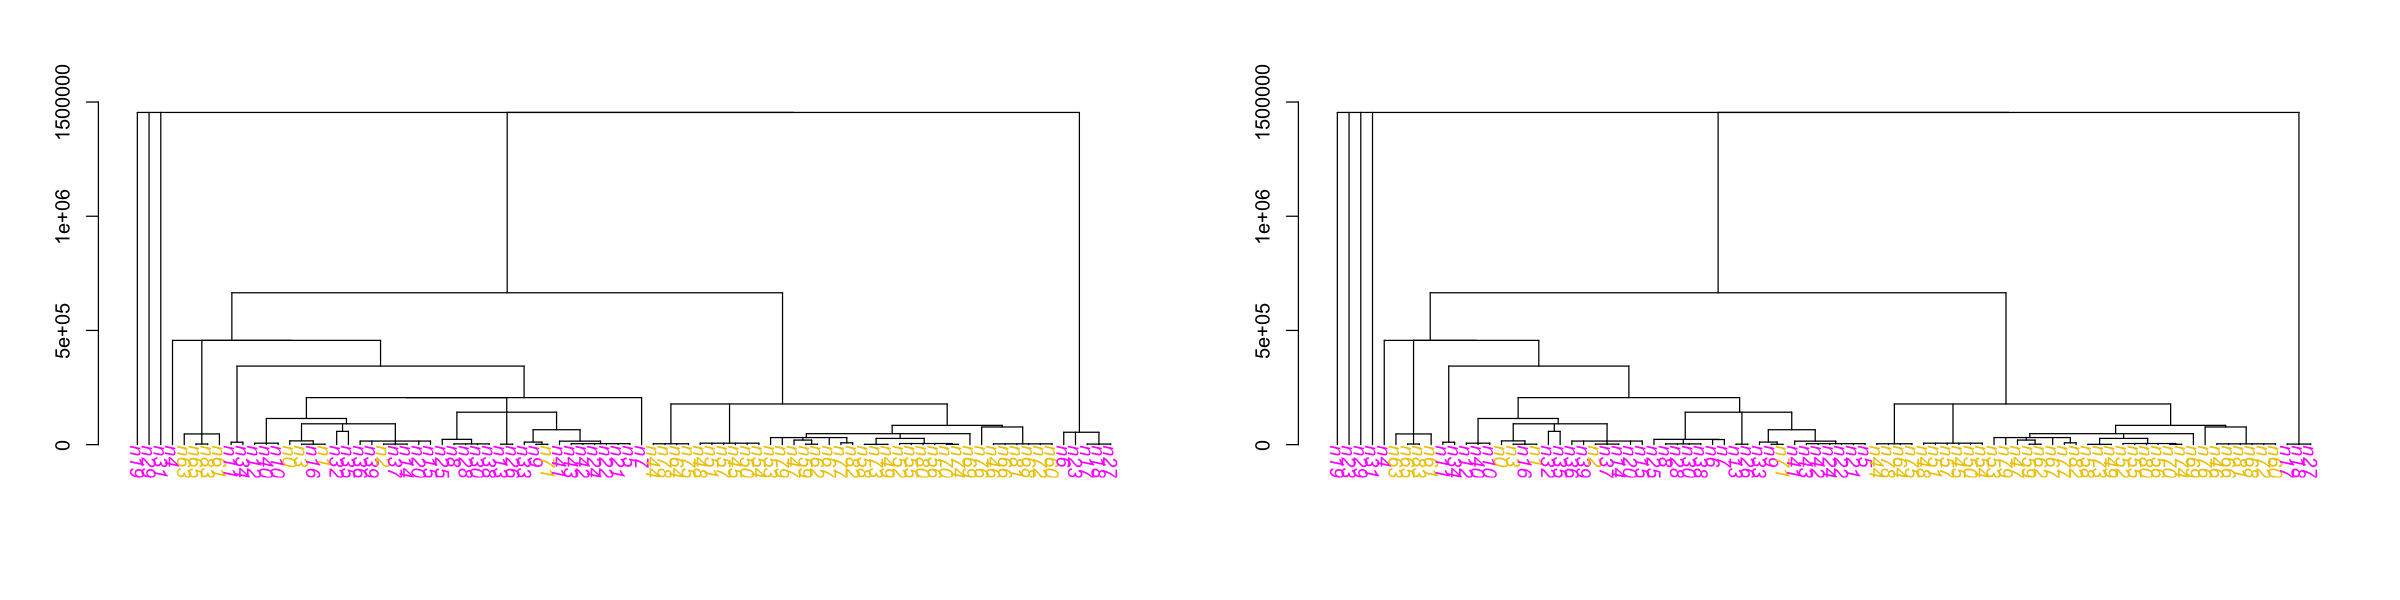

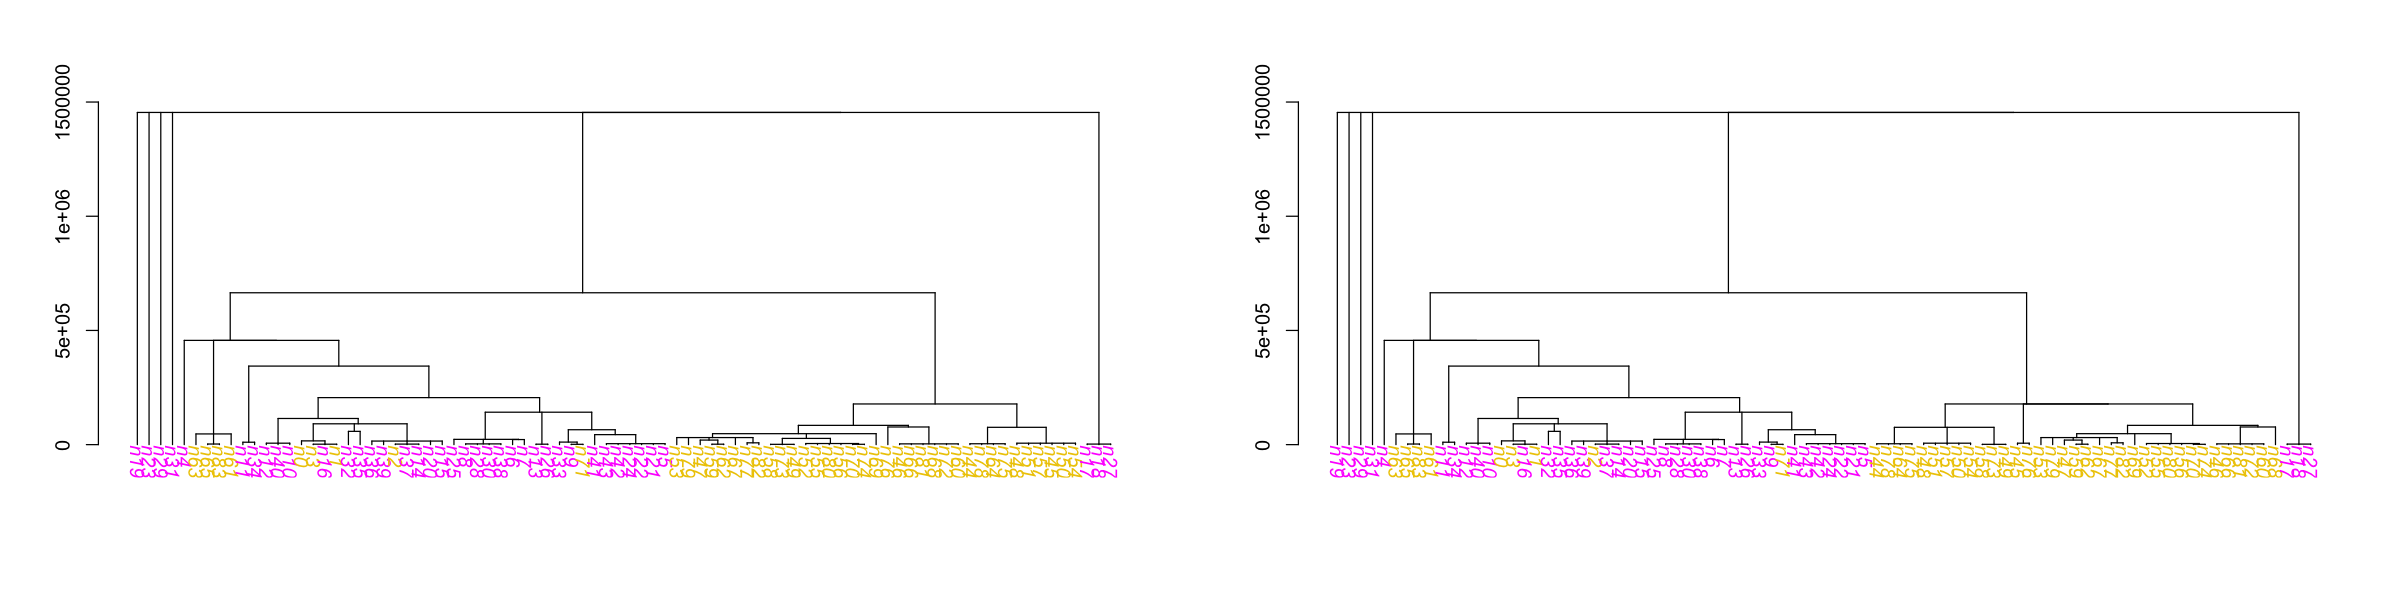

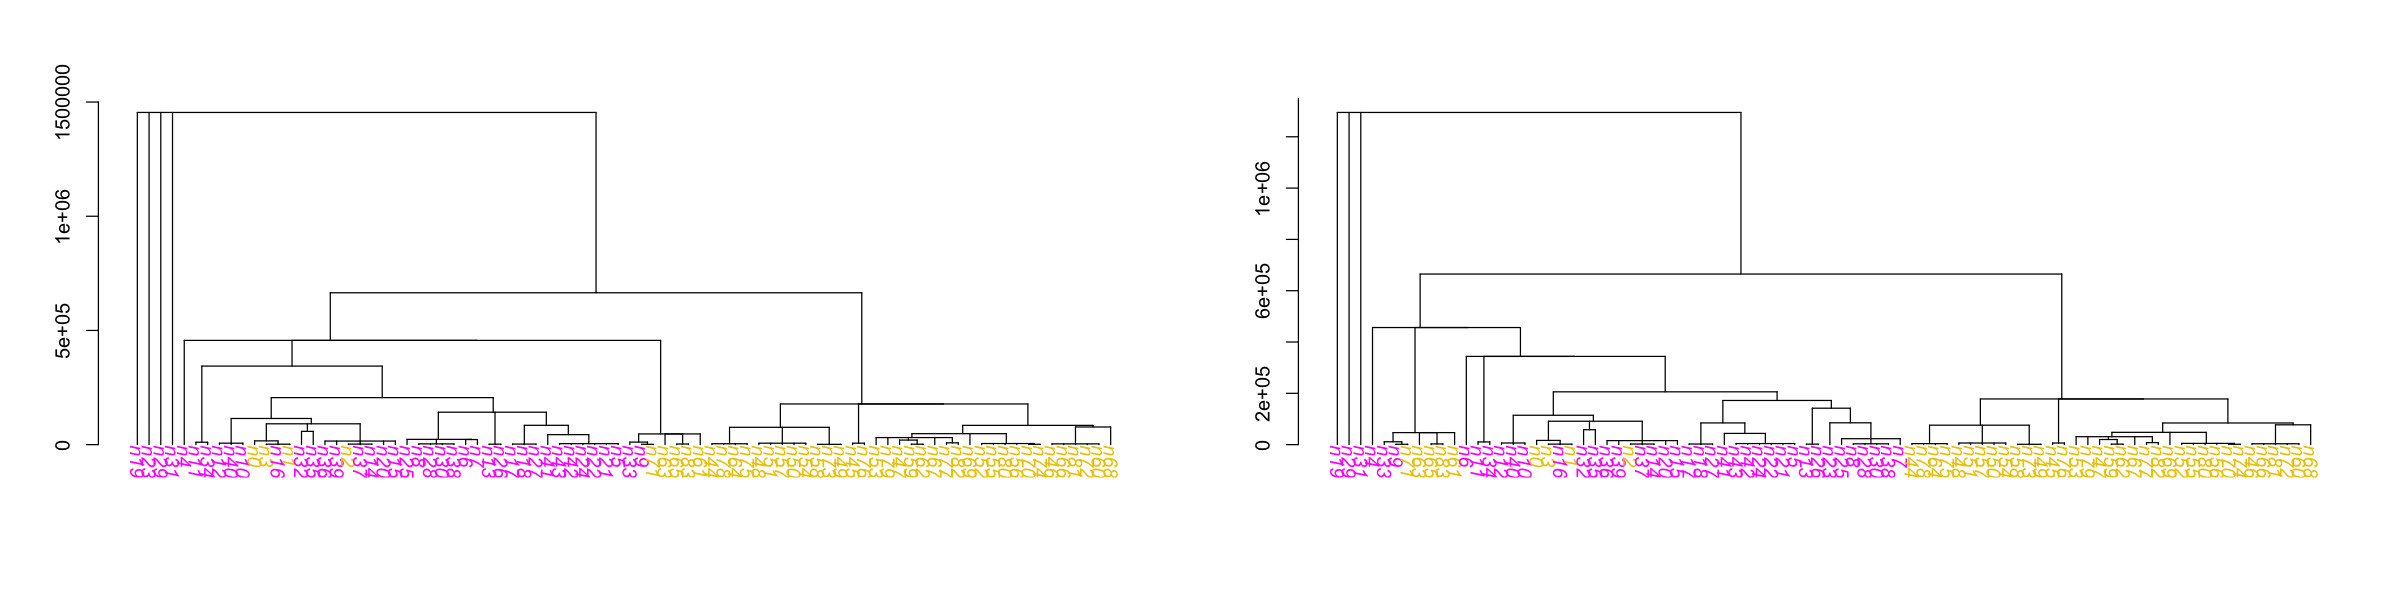

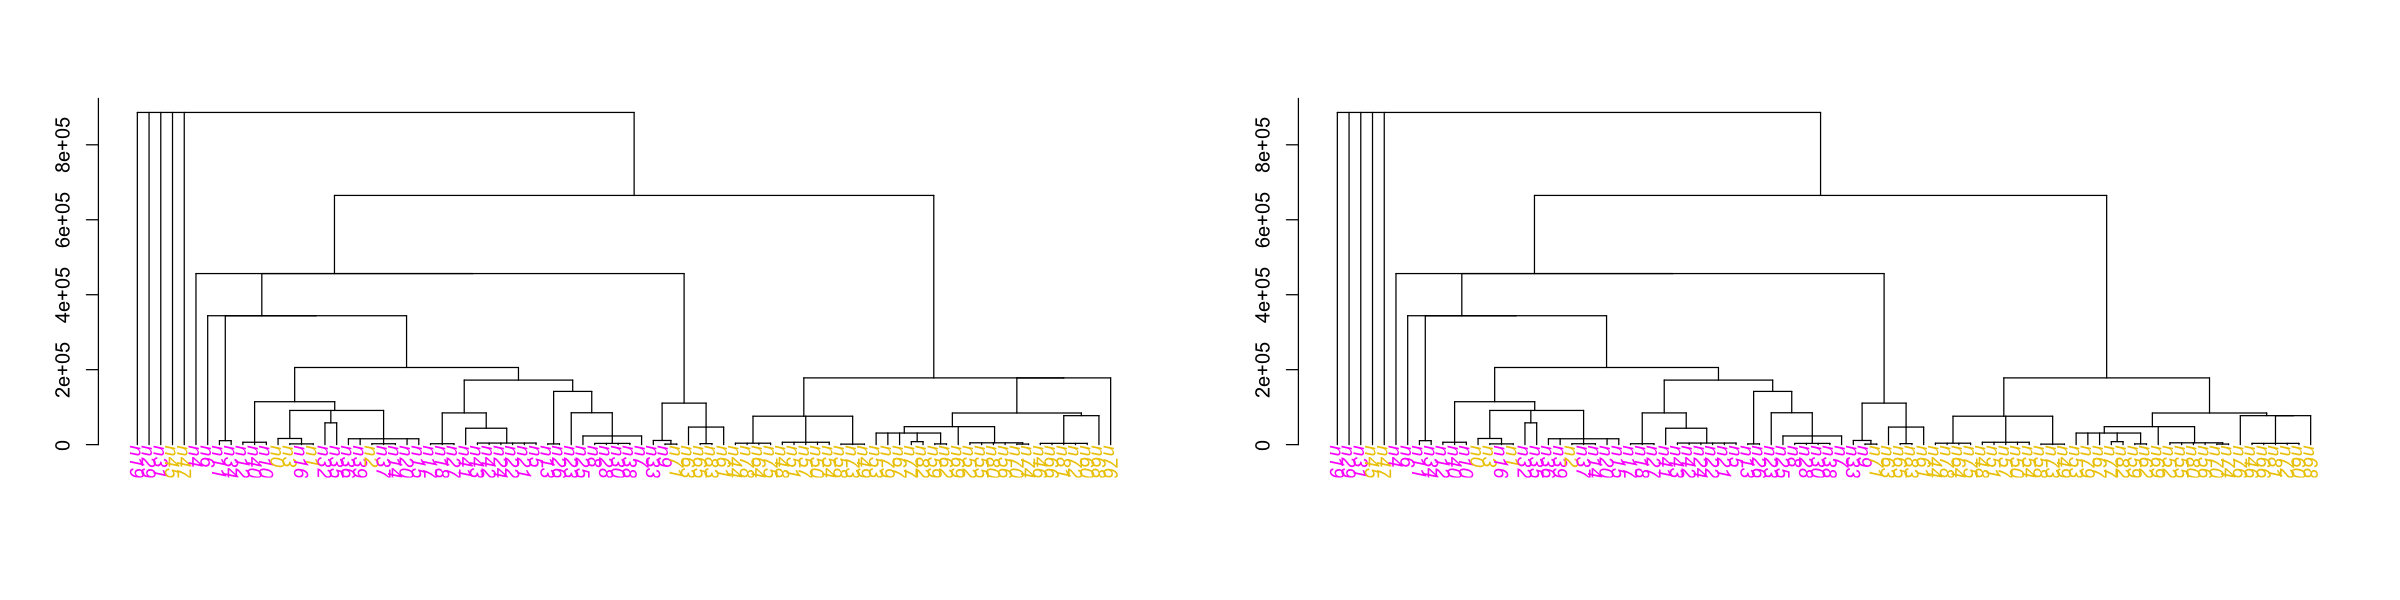

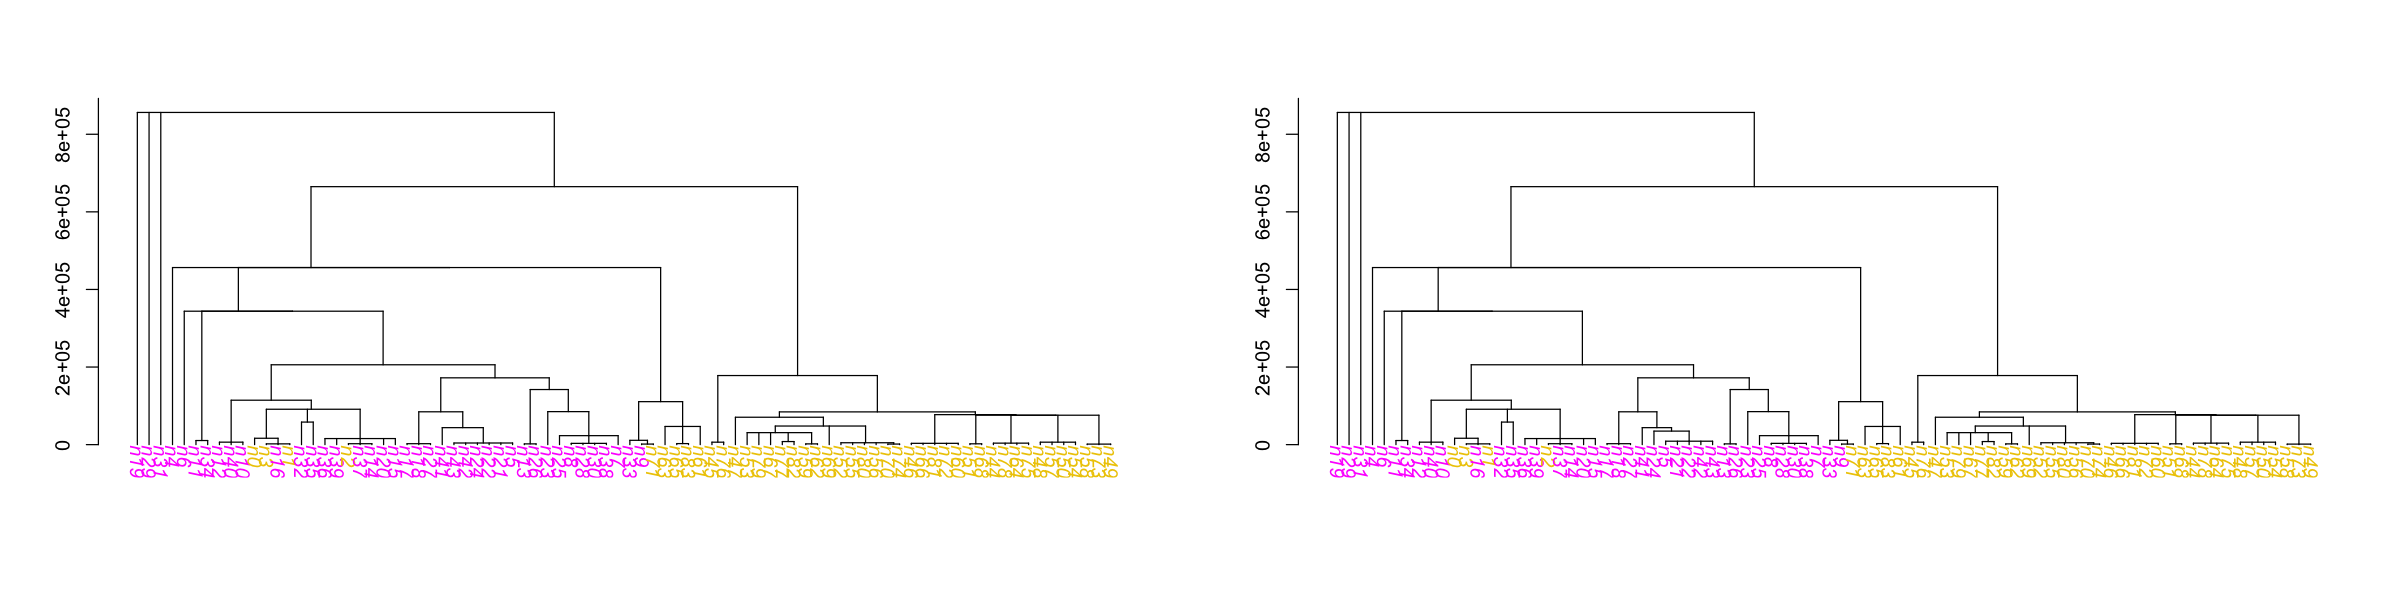

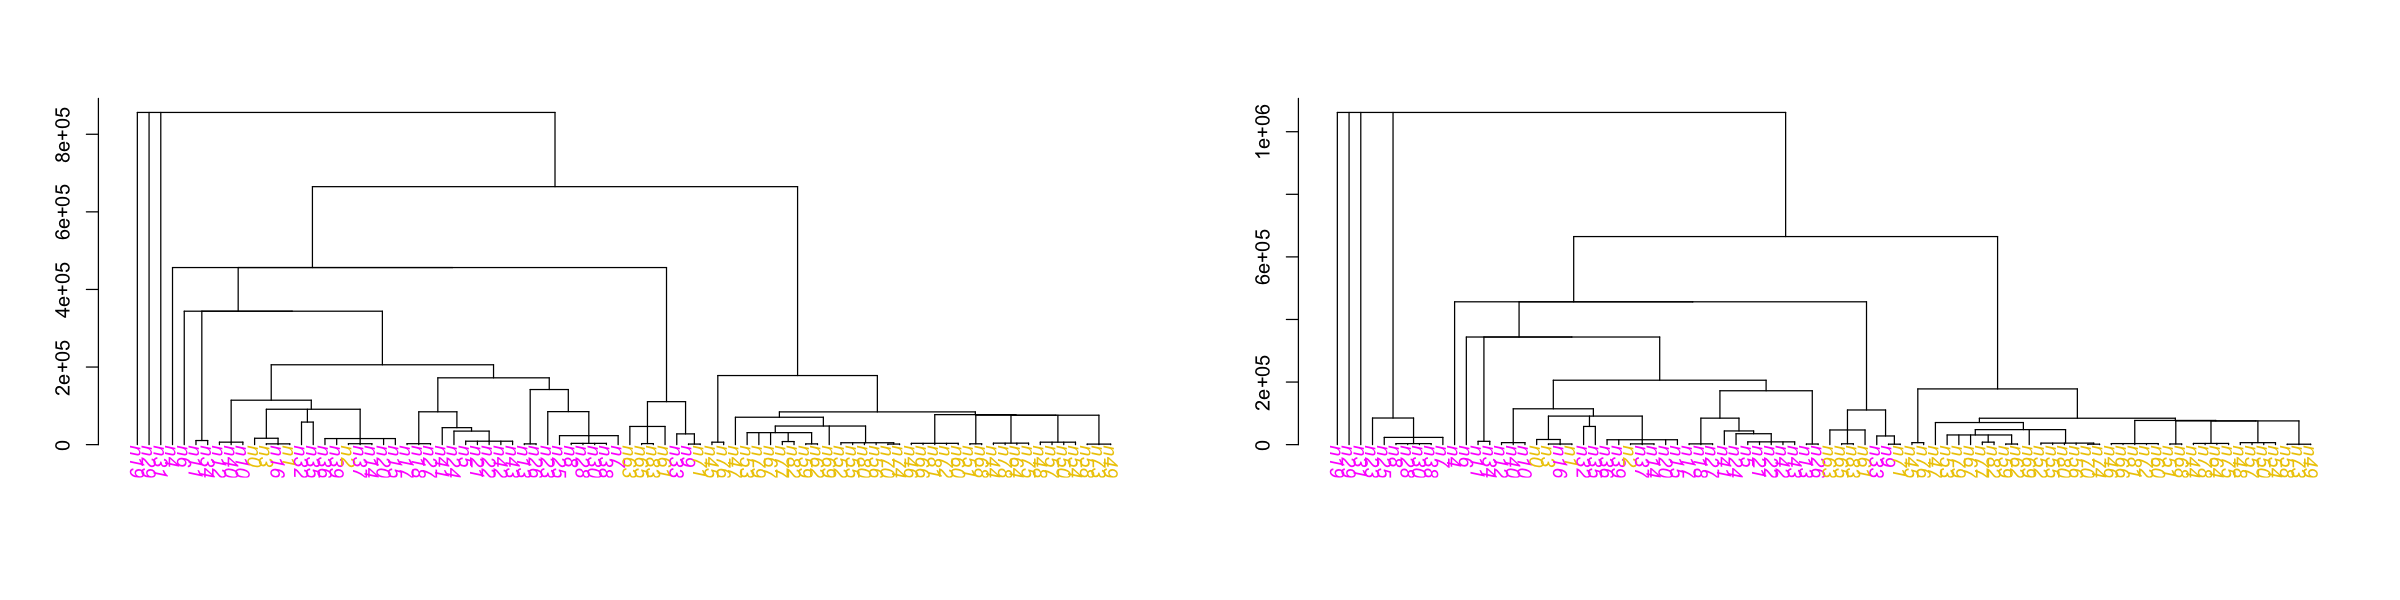

In [91]:
options(repr.plot.width=20, repr.plot.height=5)
par(mfrow=c(1,2), cex = 1)
for(trID in 2310:2347){
    tr = read.tree(text=ts_rosel$tree[trID])
    plot(tr, use.edge.length = T,
         tip.color = inds_col[match(tr$tip.label, inds_col$inds), "col"],
         direction = 'downwards')
    axisPhylo(2)
}